<div class="alert alert-block alert-success">
    
# FIT5196 Task 1 dirty data in Assessment 2
#### Student Name: Manh Tung Vu, Ilya Bessonov
#### Student ID: 30531438, 34466029

Date: 14/10/2024


Environment: Python 3.10.12

Libraries used:
1. **numpy (np)**
2. **pandas (pd)**
3. **datetime (dt)**
4. **copy**
5. **re**
6. **matplotlib.pyplot (plt)**
7. **seaborn (sns)**
8. **math**
9. **statsmodels.formula.api (sm)**
10. **statsmodels.stats.anova (sms)**
11. **sklearn.cluster.KMeans**
12. **itertools**
13. **sklearn.linear_model.LinearRegression**
14. **nltk.sentiment.vader.SentimentIntensityAnalyzer**
15. **scipy.stats.chi2**
16. **scipy.stats.norm**
17. **nltk**
</div>

<div class="alert alert-block alert-warning">

## 1.  Introduction and Objective  <a class="anchor" name="Intro"></a>
    
</div>

### Introduction

In this task, we aim to address common issues found in retail transactional data by employing data cleansing techniques to prepare the dataset for analysis. The dataset, derived from DigiCO, an online electronics retailer in Melbourne, contains various instances of customer orders. Each order comprises multiple attributes such as customer information, shopping cart details, and logistical data related to delivery. Due to an unexpected scenario, the provided data contains anomalies, missing values, and outliers, which could hinder downstream analysis if left unresolved. Data cleansing ensures the dataset’s quality and accuracy, enabling more reliable results during analysis.

### Objectives

The objectives of this task are as follows:

1. **Error Detection and Correction**: Identify and fix data anomalies present in the `Group<group_id>_dirty_data.csv` file to ensure the integrity of the dataset. This includes addressing potential inconsistencies such as incorrect values or format issues.
  
2. **Missing Data Imputation**: Handle missing data in the `Group<group_id>_missing_data.csv` file by applying appropriate imputation techniques to fill in gaps, ensuring that no valuable information is lost.
  
3. **Outlier Detection and Removal**: Detect and remove outliers in the `Group<group_id>_outlier_data.csv` file, specifically focusing on the `delivery_charges` attribute, to eliminate any extreme values that may distort the analysis.
  
4. **Generate Cleaned Data**: Produce cleaned versions of the dirty, missing, and outlier data, following proper formatting and ensuring compatibility with the auto-marker tool.
  
By successfully achieving these objectives, we aim to create a high-quality dataset ready for further exploratory and predictive analysis.

<div class="alert alert-block alert-warning">
    
## 2.  Importing Libraries  <a class="anchor" name="libs"></a>
 </div>

The packages to be used in this assessment are imported in the following. They are used to fulfill the following tasks:
1. **numpy (np)** - A library for numerical computations in Python, providing support for arrays and matrices.
2. **pandas (pd)** - A powerful library for data manipulation and analysis, particularly with tabular data.
3. **datetime (dt)** - Provides classes for manipulating dates and times.
4. **copy** - A library for creating deep or shallow copies of Python objects.
5. **re** - The regular expression (regex) library for string searching and manipulation.
6. **matplotlib.pyplot (plt)** - A plotting library used for creating static, animated, and interactive visualizations.
7. **seaborn (sns)** - A Python visualization library based on Matplotlib, used for creating attractive statistical plots.
8. **math** - Provides mathematical functions like trigonometric, logarithmic, and arithmetic operations.
9. **statsmodels.formula.api (sm)** - Provides tools for estimating statistical models and performing hypothesis tests.
10. **statsmodels.stats.anova (sms)** - Contains functions for performing ANOVA (Analysis of Variance) tests.
11. **sklearn.cluster.KMeans** - Implements the K-Means clustering algorithm for partitioning data into groups.
12. **itertools** - Provides functions for creating iterators for efficient looping.
13. **sklearn.linear_model.LinearRegression** - Provides the Linear Regression model for predicting continuous variables.
14. **nltk.sentiment.vader.SentimentIntensityAnalyzer** - A sentiment analysis tool for determining positive, negative, and neutral sentiment in text.
15. **scipy.stats.chi2** - Provides functions related to the chi-squared distribution for statistical analysis.
16. **scipy.stats.norm** - Contains tools for working with the normal (Gaussian) distribution.
17. **nltk** - A suite of libraries and programs for natural language processing (NLP).
18. **ast** - Abstract Syntax Tree. We use this library to convert string into python undertandable object

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import copy
import re
import matplotlib.pyplot as plt
import seaborn as sns
from math import *
import statsmodels.formula.api as sm
import statsmodels.stats.anova as sms
from sklearn.cluster import KMeans
import itertools
from sklearn.linear_model import LinearRegression
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from scipy.stats import chi2
from scipy.stats import norm
import nltk
import ast
from scipy import stats
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

# Handling dirty_data file

## Exploratory Data Analysis

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group044/Group044_dirty_data.csv')

In [4]:
df.shape

(500, 16)

In [5]:
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,20570.95,Autumn,True,1.1454,excellent excellent,True
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,24471.92,Summer,False,0.7287,five stars very satisfied,True
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,2273.90,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,26509.98,Autumn,True,1.0992,will it last? it is new and working great. sha...,True
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,19602.13,Summer,True,0.7944,NaN,True


The primary key in this dataframe should be order_id, thus we check if there are any duplicated order_id

In [6]:
df['order_id'].duplicated().sum()

0

All order_id are unique

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [8]:
# Create a copy of the dataframe
original_df = df.copy()

In [9]:
# Create an issue dictionary to keep track of what rows have errors
issue_dict = {}

## Check date and season column

We will try to parse date in 'date' column into datetime data type according to the specified format '%Y-%m-%d' as per assignment specification. For rows that we cannot parse, we will investigate them invidually.

In [10]:
df_date = df.copy()

In [11]:
# Check if all the date in 'date' columns are in YYYY-MM-DD format. Print out number of incorrect formatted dates and the rows which they belong to

incorrect_dates = 0
incorrect_rows = []
for index, row in df_date.iterrows():
  try:
    dt.datetime.strptime(str(row['date']), '%Y-%m-%d')
  except ValueError:
    incorrect_dates += 1
    incorrect_rows.append(index)

print("Number of incorrect formatted dates:", incorrect_dates)
print("Rows with incorrect formatted dates:", incorrect_rows)

Number of incorrect formatted dates: 27
Rows with incorrect formatted dates: [54, 97, 110, 112, 113, 126, 129, 155, 168, 170, 194, 197, 244, 283, 309, 313, 342, 352, 365, 384, 388, 398, 400, 421, 428, 464, 473]


In [12]:
issue_dict['wrong_dates'] = incorrect_rows
print(len(issue_dict['wrong_dates']))
print(issue_dict['wrong_dates'])

27
[54, 97, 110, 112, 113, 126, 129, 155, 168, 170, 194, 197, 244, 283, 309, 313, 342, 352, 365, 384, 388, 398, 400, 421, 428, 464, 473]


In [13]:
# Inspect the error dates
df_date.loc[incorrect_rows, 'date'].tolist()

['2019-29-10',
 '08-04-2019',
 '06-05-2019',
 '07-03-2019',
 '2019-22-10',
 '2019-24-11',
 '2019-22-06',
 '2019-22-02',
 '02-12-2019',
 '03-02-2019',
 '01-07-2019',
 '2019-25-12',
 '2019-18-09',
 '2019-13-09',
 '2019-14-06',
 '07-06-2019',
 '03-11-2019',
 '2019-28-06',
 '08-04-2019',
 '2019-20-12',
 '03-07-2019',
 '10-11-2019',
 '01-02-2019',
 '2019-26-01',
 '2019-18-05',
 '06-11-2019',
 '2019-22-03']

First, we will attempt to correct the format by Corrects a date string by ensuring the format is 'YYYY-MM-DD' where:
    - 'YYYY' represents the year.
    - 'MM' is the month (<= 12).
    - 'DD' is the day.

If both month and day are less than or equal to 12, returns the original string.

In [14]:
def correct_date(date_string):
    """
    Corrects a date string by ensuring the format is 'YYYY-MM-DD' where:
    - 'YYYY' represents the year.
    - 'MM' is the month (<= 12).
    - 'DD' is the day.

    If both month and day are less than or equal to 12, the function returns the original string.

    Args:
        date_string (str): A string containing a year, month, and day.

    Returns:
        str: A corrected date string in 'YYYY-MM-DD' format, or the original date string if no correction is needed.
    """
    # Extract the year from the date string (a 4-digit number)
    year = re.search(r'\b(\d{4})\b', date_string).group()

    # Find all two-digit numbers (potential month and day)
    month_day_list = re.findall(r'\b(\d{2})\b', date_string)

    # Sort the month and day candidates
    month_day_list = sorted(month_day_list)

    # If both values are <= 12, we assume no correction is needed, so return the original string
    if int(month_day_list[0]) <= 12 and int(month_day_list[1]) <= 12:
        return date_string
    else:
        # Otherwise, the first value is the month, and the second value is the day
        month = month_day_list[0]
        day = month_day_list[1]
        return year + '-' + month + '-' + day

In [15]:
df_date.loc[incorrect_rows, 'date'] = df_date.loc[incorrect_rows, 'date'].apply(correct_date)

See how many incorrect dates left

In [16]:
incorrect_dates_after_fix_1 = 0
incorrect_rows_after_fix_1 = []
for index, row in df_date.iterrows():
  try:
    dt.datetime.strptime(str(row['date']), '%Y-%m-%d')
  except ValueError:
    incorrect_dates_after_fix_1 += 1
    incorrect_rows_after_fix_1.append(index)

print("Number of incorrect formatted dates:", incorrect_dates_after_fix_1)
print("Rows with incorrect formatted dates:", incorrect_rows_after_fix_1)

Number of incorrect formatted dates: 13
Rows with incorrect formatted dates: [97, 110, 112, 168, 170, 194, 313, 342, 365, 388, 398, 400, 464]


Another source of information that we can use to fix the date is season. We will attempt to find the month by checking with season. Because there is one and only one error per row, we will pick the date month order to match with season

In [17]:
# Dictionary that defines the months for each season.
season_dict = {'Spring': [9, 10, 11],  # Spring includes September, October, November
               'Summer': [12, 1, 2],   # Summer includes December, January, February
               'Autumn': [3, 4, 5],    # Autumn includes March, April, May
               'Winter': [6, 7, 8]}    # Winter includes June, July, August

def correct_date_based_on_season(date_string, season):
    """
    Corrects a date string by verifying that the month corresponds to the specified season.
    The function assumes that the year is always correct. The month and day are inferred from the date string
    and checked against the months that belong to the provided season.

    If one of the month/day values matches the season, it assumes that value is the correct month
    and formats the date as 'YYYY-MM-DD'. If neither value matches the season, the original string is returned.

    Args:
        date_string (str): A string containing a year, month, and day.
        season (str): The season for which the date should be validated. Must be one of 'Spring', 'Summer', 'Autumn', or 'Winter'.

    Returns:
        str: A corrected date string in 'YYYY-MM-DD' format, or the original date string if no correction is needed.
    """
    # Extract the year from the date string (a 4-digit number)
    year = re.search(r'\b(\d{4})\b', date_string).group()

    # Find all two-digit numbers (potential month and day)
    month_day_list = re.findall(r'\b(\d{2})\b', date_string)

    # Convert month and day candidates to integers
    month_day_list = [int(x) for x in month_day_list]

    # Get the list of months that belong to the specified season
    season_months = season_dict[season]

    # Check if both month and day are in the season's valid months
    if (month_day_list[0] in season_months) and (month_day_list[1] in season_months):
        return date_string  # No correction needed, return original string
    # If the first value matches the season, assume it is the correct month
    elif month_day_list[0] in season_months:
        month = month_day_list[0]
        day = month_day_list[1]
        return year + '-' + str(month) + '-' + str(day)
    # If the second value matches the season, assume it is the correct month
    elif month_day_list[1] in season_months:
        month = month_day_list[1]
        day = month_day_list[0]
        return year + '-' + str(month) + '-' + str(day)
    else:
        return date_string  # No valid month found, return the original string

In [18]:
df_date.loc[incorrect_rows_after_fix_1, 'date'] = df_date.loc[incorrect_rows_after_fix_1].apply(lambda row: correct_date_based_on_season(row['date'], row['season']), axis=1)

In [19]:
incorrect_dates_after_fix_2 = 0
incorrect_rows_after_fix_2 = []
for index, row in df_date.iterrows():
  try:
    dt.datetime.strptime(str(row['date']), '%Y-%m-%d')
  except ValueError:
    incorrect_dates_after_fix_2 += 1
    incorrect_rows_after_fix_2.append(index)

print("Number of incorrect formatted dates:", incorrect_dates_after_fix_2)
print("Rows with incorrect formatted dates:", incorrect_rows_after_fix_2)

Number of incorrect formatted dates: 4
Rows with incorrect formatted dates: [168, 313, 398, 400]


In [20]:
df_date.loc[incorrect_rows_after_fix_2, ['date', 'season']]

,date,season
168,02-12-2019,Summer
313,07-06-2019,Winter
398,10-11-2019,Spring
400,01-02-2019,Summer


We cannot yet say for sure what is the day and what is the month. We made an assumption that it's in the DD-MM-YYYY format (Melbourne format) as per assignment specification:



>   _If the first 2 item in the date are both smaller than 12 thus hard to decide which one is DD which one is MM (e.g. 10-05-2018) . I would say you can safely make the assumption: it's in the DD-MM-YYYY format (Melbourne format), thus you should fix that into YYYY-MM-DD format._



In [21]:
def convert_date_from_DD_MM_YYYY(date_str):
  """
  Convert date from DD-MM-YYYY to YYYY-MM-DD
  """
  return date_str[6:10] + '-' + date_str[3:5] + '-' + date_str[:2]

In [22]:
df_date.loc[incorrect_rows_after_fix_2, 'date'] = df_date.loc[incorrect_rows_after_fix_2, 'date'].apply(convert_date_from_DD_MM_YYYY)

In [23]:
# Typecast date to datetime format for future use and so to make sure it is well formatted
df_date['date_dt'] = pd.to_datetime(df_date['date'], format='%Y-%m-%d')

In [24]:
# Correct in original dataframe
df.loc[:, 'date'] = df_date.loc[:, 'date']


## Check season with date

In [25]:
def check_season(date):
    """
    Determine the season based on the given date.

    This function takes a date object and returns the corresponding season
    based on the month of the year. The months are categorized as follows:
    - Summer: December, January, February
    - Autumn: March, April, May
    - Winter: June, July, August
    - Spring: September, October, November

    Args:
        date (datetime): A date object from which the month will be extracted.

    Returns:
        str: The name of the season ('Summer', 'Autumn', 'Winter', or 'Spring') corresponding to the month of the input date.
    """

    # Extract the month from the date
    month = date.month

    # Determine the season based on the month
    if month in [12, 1, 2]:
        return 'Summer'  # December, January, and February are considered Summer
    elif month in [3, 4, 5]:
        return 'Autumn'  # March, April, and May are considered Autumn
    elif month in [6, 7, 8]:
        return 'Winter'  # June, July, and August are considered Winter
    else:
        return 'Spring'  # September, October, and November are considered Spring

In [26]:
df_date['season_check'] = df_date['date_dt'].apply(check_season)

In [27]:
filt_match_season = df_date['season_check'] != df_date['season']
print(f"Number of rows where season does not match the season name from the date: {filt_match_season.sum()}")
df_date[filt_match_season][['season', 'season_check', 'date_dt']]

Number of rows where season does not match the season name from the date: 27


,season,season_check,date_dt
11,summer,Winter,2019-08-05
12,winter,Spring,2019-10-28
18,winter,Winter,2019-07-13
32,autumn,Summer,2019-12-28
57,Winter,Summer,2019-01-08
92,winter,Winter,2019-08-13
94,Winter,Autumn,2019-03-25
105,Autumn,Summer,2019-02-09
132,spring,Autumn,2019-05-16
183,Winter,Spring,2019-11-13


In [28]:
issue_dict['wrong_season'] = df_date[filt_match_season].index.tolist()
print(len(issue_dict['wrong_season']))
print(issue_dict['wrong_season'])

27
[11, 12, 18, 32, 57, 92, 94, 105, 132, 183, 189, 213, 246, 251, 252, 259, 272, 311, 351, 357, 373, 390, 391, 393, 410, 486, 490]


There is only one error per row and some season names are not capitalised which is an error in that row. Since we can't be sure if the error is in the season or in date_dt, we will fix rows that we are sure of first. Our approach is as follow:
1. Correct the season for lower-case season name since lower-case is the one error in that row
2. Correct the season for rows where swapping the day and month results in an invalid date.
3. Correct the season for rows that swapped dates produces an unmatch season.

Details are below.


In [29]:
# Filter for rows where 'season' is in lowercase
filt_lowercase_season = df_date['season'].str.islower()

lower_case_and_season_match_filt = filt_match_season & filt_lowercase_season

df_date.loc[lower_case_and_season_match_filt, ['season', 'season_check', 'date_dt']]

,season,season_check,date_dt
11,summer,Winter,2019-08-05
12,winter,Spring,2019-10-28
18,winter,Winter,2019-07-13
32,autumn,Summer,2019-12-28
92,winter,Winter,2019-08-13
132,spring,Autumn,2019-05-16
213,spring,Autumn,2019-04-11
246,spring,Autumn,2019-04-28
272,spring,Summer,2019-02-22
311,winter,Winter,2019-07-25


In [30]:
# Correct season for these columns
df_date.loc[lower_case_and_season_match_filt, 'season'] = df_date.loc[lower_case_and_season_match_filt, 'season_check']

In [31]:
# Check if the fix is successful
filt_lowercase_season = df_date['season'].str.islower()

lower_case_and_season_match_filt = filt_match_season & filt_lowercase_season

df_date.loc[lower_case_and_season_match_filt, ['season', 'season_check', 'date_dt']]

,season,season_check,date_dt


In [32]:
filt_match_season = df_date['season_check'] != df_date['season']
df_fixing_season = df_date.loc[filt_match_season, ['season', 'season_check', 'date', 'date_dt']].copy()
df_fixing_season

,season,season_check,date,date_dt
57,Winter,Summer,2019-01-08,2019-01-08
94,Winter,Autumn,2019-03-25,2019-03-25
105,Autumn,Summer,2019-02-09,2019-02-09
183,Winter,Spring,2019-11-13,2019-11-13
189,Summer,Spring,2019-11-24,2019-11-24
251,Winter,Summer,2019-01-04,2019-01-04
252,Spring,Summer,2019-02-03,2019-02-03
259,Winter,Summer,2019-01-22,2019-01-22
357,Summer,Autumn,2019-05-08,2019-05-08


In these rows, the error could be in either the date or the season, but according to the assignment specifications, there is only one correct way to fix each row.

To fix the date based on the season, we can try swapping the day and month and check if it produces a match season. If the swap creates a valid date (i.e., both day and month are ≤12), we check if it produces a match season. However, if swapping results in an invalid date (where either the day or month is greater than 12), then the error is in the season, not the date.

We’ll first correct the season for rows where swapping the day and month results in an invalid date.

In [33]:

def check_date_month_greater_than_12(date_string):
  """
  Checks if the month or date in the given date string is greater than 12.

  Args:
      date_string (str): The date string in the format 'YYYY-MM-DD'.

  Returns:
      bool: True if either month or date is greater than 12, False otherwise.
  """
  try:
    year, month, day = map(int, date_string.split('-'))
    if month > 12 or day > 12:
      return True
    return False
  except ValueError:
    return False  # Handle cases where the string is not a valid date

In [34]:
#Test
check_date_month_greater_than_12('2023-13-01')

True

In [35]:
df_fixing_season[df_fixing_season['date'].apply(check_date_month_greater_than_12)]

,season,season_check,date,date_dt
94,Winter,Autumn,2019-03-25,2019-03-25
183,Winter,Spring,2019-11-13,2019-11-13
189,Summer,Spring,2019-11-24,2019-11-24
259,Winter,Summer,2019-01-22,2019-01-22


For these rows, we will correct the season based on the season_check

In [36]:
indexes_temp = df_fixing_season[df_fixing_season['date'].apply(check_date_month_greater_than_12)].index.tolist()
print(indexes_temp)

[94, 183, 189, 259]


In [37]:
df_date.loc[indexes_temp, 'season'] = df_date.loc[indexes_temp, 'season_check']

In [38]:
# Confirm if we fixed the rows
filt_match_season = df_date['season_check'] != df_date['season']
df_fixing_season = df_date.loc[filt_match_season, ['season', 'season_check', 'date', 'date_dt']].copy()
df_fixing_season

,season,season_check,date,date_dt
57,Winter,Summer,2019-01-08,2019-01-08
105,Autumn,Summer,2019-02-09,2019-02-09
251,Winter,Summer,2019-01-04,2019-01-04
252,Spring,Summer,2019-02-03,2019-02-03
357,Summer,Autumn,2019-05-08,2019-05-08


There are 5 rows left. For rows which swapping date and month create a valid date, we will check if swapped date produce a season, 'season_check_2' , that match the current season in 'season' column. If 'season_check_2' doesn't match 'season', then the season is wrong, we will correct the 'season' to 'season_check'. If 'season_check_2' matches with 'season', we are unsure whether the date is swapped or season is incorrect, we will leave it for now.


In [39]:
def swap_day_month(date_str):
  """
  Swaps the day and month in a date string (YYYY-MM-DD format).

  Args:
      date_str (str): The date string to swap.

  Returns:
      str: The date string with day and month swapped, or the original string if the swap results in an invalid date.
  """
  try:
    year, month, day = map(int, date_str.split('-'))
    if int(day) <= 12 and int(month) <= 12:
      return f"{year}-{day}-{month}"
    else:
      return date_str
  except ValueError:
    return date_str

# Apply the swap_day_month function to the 'date' column and create a new column 'date_swapped'
df_fixing_season['date_swapped'] = df_fixing_season['date'].apply(swap_day_month)

# Convert 'date_swapped' to datetime and check if it creates a valid season
df_fixing_season['date_swapped_dt'] = pd.to_datetime(df_fixing_season['date_swapped'], errors='coerce', format='%Y-%m-%d')
df_fixing_season['season_check_2'] = df_fixing_season['date_swapped_dt'].apply(check_season)

# Filter rows where 'season_check_2' doesn't match the current 'season'
filt_season_check_2_not_match_season = df_fixing_season['season_check_2'] != df_fixing_season['season']
df_fixing_season[filt_season_check_2_not_match_season]


,season,season_check,date,date_dt,date_swapped,date_swapped_dt,season_check_2
105,Autumn,Summer,2019-02-09,2019-02-09,2019-9-2,2019-09-02,Spring
251,Winter,Summer,2019-01-04,2019-01-04,2019-4-1,2019-04-01,Autumn
252,Spring,Summer,2019-02-03,2019-02-03,2019-3-2,2019-03-02,Autumn
357,Summer,Autumn,2019-05-08,2019-05-08,2019-8-5,2019-08-05,Winter


In [40]:
# Correct the 'season' for those rows
df_date.loc[df_fixing_season[filt_season_check_2_not_match_season].index, 'season'] = df_fixing_season.loc[filt_season_check_2_not_match_season, 'season_check']

# Now, check if any mismatches are left.
filt_match_season = df_date['season_check'] != df_date['season']
print(f"Number of rows where season does not match the season name from the date: {filt_match_season.sum()}")
df_date.loc[filt_match_season, ['season', 'season_check', 'date', 'date_dt']]

Number of rows where season does not match the season name from the date: 1


,season,season_check,date,date_dt
57,Winter,Summer,2019-01-08,2019-01-08


In [41]:
unsure_season_correction_lst = df_date.loc[filt_match_season, ['season', 'season_check', 'date', 'date_dt']].index.tolist()
print(len(unsure_season_correction_lst))
print(unsure_season_correction_lst)

1
[57]


There is only one row left, we will leave them here for now.

In [42]:
df_date.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer', 'date_dt', 'season_check'],
      dtype='object')

In [43]:
# Correct all possible seasons in original dataframe
df['season'] = df_date['season']

## Check sentiment errors (Customer_happy column)

In [44]:
sia = SentimentIntensityAnalyzer()

In [45]:
# Test a random review
ind = 7
sentence = df.loc[ind, 'latest_customer_review']
print(sentence)
is_happy = df.loc[ind, 'is_happy_customer']
scores = sia.polarity_scores(sentence)
print(scores)
print(is_happy)

data account not accessible despite it saying that this phone is unlocked, i was unable to use with my at&t data account could only access data when i was at home or another place with wifi
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
False


In [46]:
# Define a function used to check sentiment of review
def check_sentiment(review, sia, threshold=0.00):
  """
    Check the sentiment of a review using SentimentIntensityAnalyzer.

    If the review is empty, None, or NaN, the function returns True (positive sentiment by default).
    Otherwise, it calculates the compound sentiment score using `sia` and returns True if the score
    is greater than or equal to the threshold.

    Parameters:
    -----------
    review : str or None
        The text review to analyze. Returns True if None, empty, or NaN.
    sia : SentimentIntensityAnalyzer
        Instance of SentimentIntensityAnalyzer used to compute sentiment scores.
    threshold : float, optional
        Minimum compound score to classify a review as positive (default is 0.00).

    Returns:
    --------
    bool
        True for positive sentiment, False otherwise.
    """
  if review is None or review == '' or review is np.nan:
    return True
  scores = sia.polarity_scores(review)
  return scores['compound'] >= threshold

In [47]:
# Replace all NA value with ""
df['latest_customer_review'] = df['latest_customer_review'].fillna("").astype(str)

df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,20570.95,Autumn,True,1.1454,excellent excellent,True
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,24471.92,Summer,False,0.7287,five stars very satisfied,True
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,2273.90,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,26509.98,Autumn,True,1.0992,will it last? it is new and working great. sha...,True
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,19602.13,Summer,True,0.7944,,True


In [48]:
# Create a copy of original df for sentiment analysis
df_sentiment = df.copy()

In [49]:
df_sentiment['sentiment_check'] = df_sentiment['latest_customer_review'].apply(lambda x: check_sentiment(str(x), sia, threshold=0.05))
df_sentiment.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,sentiment_check
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,20570.95,Autumn,True,1.1454,excellent excellent,True,True
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,24471.92,Summer,False,0.7287,five stars very satisfied,True,True
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,2273.90,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False,False
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,26509.98,Autumn,True,1.0992,will it last? it is new and working great. sha...,True,True
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,19602.13,Summer,True,0.7944,,True,True


In [50]:
# Show the differences between is_happy_customer and sentiment_check
df_diff = df_sentiment[df_sentiment['is_happy_customer'] != df_sentiment['sentiment_check']]
print(df_diff.shape)
df_diff.head()

(27, 17)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,sentiment_check
8,ORD044328,ID3994641808,2019-02-03,Bakers,"[('iAssist Line', 1), ('Alcon 10', 1), ('Candl...",16395,75.32,-37.799119,144.995448,0,16470.32,Summer,False,1.2110,great phone awsome!!!!!!,False,True
30,ORD228765,ID0595594347,2019-04-14,Nickolson,"[('iAssist Line', 2), ('Candle Inferno', 1), (...",14750,80.59,-37.810138,144.969765,10,13355.59,Autumn,True,0.9416,just good no comment at all,False,True
64,ORD164960,ID0575524495,2019-11-06,Nickolson,"[('pearTV', 1), ('iAssist Line', 1), ('Alcon 1...",19665,64.28,-37.819807,144.981055,10,17762.78,Spring,False,1.0206,returning universe s6 i'm returning this phone...,True,False
90,ORD332442,ID0576878090,2019-09-05,Nickolson,"[('Candle Inferno', 1), ('Lucent 330S', 1)]",1660,72.53,-37.816153,144.972421,15,1483.53,Spring,False,0.3709,so far so good will post from costa rica when ...,False,True
98,ORD206084,ID0031477169,2019-06-09,Bakers,"[('Olivia x460', 1), ('Alcon 10', 1), ('Lucent...",17085,64.97,-37.798960,144.984274,15,14587.22,Winter,True,1.5615,crappy battery this is my 4th refurbished phon...,True,False


Since review can not be wrong, then we should correct is_happy_customer

In [51]:
# Record the rows with errors into a issue dictionary
issue_dict['wrong_is_happy_score'] = df_diff.index.tolist()
print(len(issue_dict['wrong_is_happy_score']))
print(issue_dict['wrong_is_happy_score'])

27
[8, 30, 64, 90, 98, 186, 210, 228, 237, 245, 254, 257, 267, 280, 285, 299, 303, 318, 325, 335, 336, 339, 371, 409, 443, 482, 497]


In [52]:
# Correct errors in is_happy_customer in the original df
df['is_happy_customer'] = df['latest_customer_review'].apply(lambda x: check_sentiment(str(x), sia, threshold=0.05))

## Check shopping_cart, order_price, and order_total

We don't have a unit price for each item in the shopping cart. We need this information before we can fix any errors related to shopping carts. Our approach is
1. Extract item names using Abstract Syntax Tree
2. Use rows that contains no error (rows we have corrected the errors previously since there are maximum of 1 error per row) to solve for item unit price

### Extract item names

In [53]:
# Create a copy of the original dataframe
df_cart = df.copy()

In [54]:
def convert_to_python(cart_str):
    """
    Convert a string representation of a Python object (e.g., list, dict) to an actual Python object.

    This function attempts to convert a string that represents a Python data structure (such as a list, dictionary,
    tuple, etc.) into the actual Python object using `ast.literal_eval()`. If the string is not a valid Python
    expression or contains a syntax error, the original string is returned.

    Args:
        cart_str (str): A string that potentially represents a Python object.

    Returns:
        object: The evaluated Python object if conversion is successful (e.g., list, dict), or the original string
                if an error occurs during conversion.

    Raises:
        ValueError: If the string contains a value that can't be safely evaluated.
        SyntaxError: If the string has incorrect syntax preventing it from being parsed.
    """
    try:
        # Attempt to evaluate the string as a Python expression
        return ast.literal_eval(cart_str)  # Safely convert string to Python object
    except (ValueError, SyntaxError):
        # If there's an error (e.g., invalid syntax), return the original string
        return cart_str

In [55]:
# Typecast to python
df_cart['shopping_cart_dict'] = df_cart['shopping_cart'].apply(convert_to_python)
df_cart['shopping_cart_list'] = df_cart['shopping_cart'].apply(convert_to_python)

# Typecast shopping_cart to a dictionary
df_cart['shopping_cart_dict'] = df_cart['shopping_cart_dict'].apply(lambda x: dict(x))

# Inspect the output
df_cart['shopping_cart_dict'].head()

,shopping_cart_dict
0,"{'pearTV': 2, 'Alcon 10': 1}"
1,"{'Toshika 750': 1, 'Thunder line': 1, 'Alcon 1..."
2,"{'Thunder line': 1, 'iStream': 1}"
3,"{'Lucent 330S': 2, 'Universe Note': 2, 'pearTV..."
4,"{'Lucent 330S': 2, 'Universe Note': 1, 'iAssis..."


Now, we will work on the copy version to preserve our original data.

In [56]:
# Extract the item names
df_cart['shopping_items'] = df_cart['shopping_cart_dict'].apply(lambda x: list(x.keys()))
brands = df_cart['shopping_items'].explode().unique()
brands

array(['pearTV', 'Alcon 10', 'Toshika 750', 'Thunder line', 'iStream',
       'Lucent 330S', 'Universe Note', 'iAssist Line', 'Olivia x460',
       'Candle Inferno'], dtype=object)

### Solve for unit price

We will create a new columns for each of the branded items to record the quantity in the shopping cart.

In [57]:
# Create new columns for each branded item and initialise
for brand in brands:
  df_cart[brand] = df_cart['shopping_cart_dict'].apply(lambda x: x.get(brand, 0))

# Inspect the output
df_cart.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,pearTV,Alcon 10,Toshika 750,Thunder line,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,...,2,1,0,0,0,0,0,0,0,0
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,...,0,2,1,1,0,0,0,0,0,0
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,...,0,0,0,1,1,0,0,0,0,0
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,...,2,0,0,0,0,2,2,2,0,0
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,...,0,0,0,0,0,2,1,2,0,0


We will use rows which have wrong 'is_happy_customer' to solve for unit price. Then, we will use rows that have different errors to verify our result for item price. The indexes of those rows are kept in issue_dict.

In [58]:
df_solve = df_cart.loc[issue_dict['wrong_is_happy_score']]
matrix = df_solve[brands].values
matrix

array([[0, 1, 0, 2, 0, 0, 0, 1, 0, 2],
       [0, 0, 2, 0, 0, 1, 0, 2, 0, 1],
       [1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 2, 0, 2, 1, 0],
       [1, 0, 0, 0, 0, 2, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 2, 0, 0, 0],
       [2, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 2, 0, 1, 0, 1],
       [0, 2, 0, 0, 2, 1, 0, 2, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 2, 0, 2, 0],
       [2, 2, 0, 1, 0, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [2, 0, 1, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 2, 0, 0, 1, 0, 0, 2, 0],
       [0, 2, 0, 0, 1, 0, 0, 2, 1, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 2, 2],
       [2, 0, 0, 0, 0, 2, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 2, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 2, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [2, 2, 1, 0, 0, 0,

In [59]:
order_price_vector = df_solve['order_price'].values
order_price_vector

array([16395, 14750, 19665,  1660, 17085,  9995,  9080, 22950, 14065,
       23880, 13700, 21970, 33130, 13480, 19390, 12320, 23725,  9380,
       12260, 19530,  1375, 12045,  8835,  5550,  7770, 34840,  5630])

Now, we reduces the matrix and order price vector by iteratively combining two consecutive rows of the matrix and their corresponding order prices until the matrix has no more than 10 rows. We do this to create a smaller matrix and still preserve the information in the large matrix, we aim to achieve 10 linear independent rows that we can use to solve for unit price. If after reducing to a 10x10 matrix, our rows are not linear independent, we will grab different set of rows.

In [60]:
# Functionality: This code reduces the matrix and order price vector by iteratively
# combining two consecutive rows of the matrix and their corresponding order prices
# until the matrix has no more than 10 rows.

# Initialize variables
index = -1  # Keeps track of the current row index to reduce
reduced_matrix = copy.copy(matrix)  # Create a copy of the matrix to avoid modifying the original
reduced_vector = copy.copy(order_price_vector)  # Create a copy of the order price vector

# Reduce the matrix and order price vector until the matrix has no more than 10 rows
while reduced_matrix.shape[0] > 10:
    index += 1

    # Reset the index if it goes beyond the bounds of the matrix rows (index wrap-around)
    if index >= reduced_matrix.shape[0] - 2:
        index = 0

    # Split the matrix into three parts:
    # 1. Rows before the index
    high_matrix = reduced_matrix[:index, :]

    # 2. Rows after the two consecutive rows that will be combined (index + 2 onwards)
    low_matrix = reduced_matrix[index+2:, :]

    # Similarly, split the order price vector into two parts
    high_order_price = reduced_vector[:index]
    low_order_price = reduced_vector[index+2:]

    # Sum two consecutive rows of the matrix and create a combined row
    two_rows_sum = np.sum(reduced_matrix[index:index+2, :], axis=0)

    # Rebuild the reduced matrix by stacking the previous rows, the new combined row,
    # and the remaining rows
    reduced_matrix = np.vstack((high_matrix, two_rows_sum, low_matrix))

    # Sum the corresponding two order prices
    two_prices_sum = np.array([reduced_vector[index] + reduced_vector[index+1]])

    # Rebuild the reduced order price vector similarly to the matrix
    reduced_vector = np.concatenate((high_order_price, two_prices_sum, low_order_price))

# Print the final reduced matrix and order price vector after reduction process
print(reduced_matrix)
print(reduced_vector)

[[1 2 2 3 0 2 0 4 0 4]
 [3 2 0 1 1 5 2 2 2 0]
 [2 4 1 0 2 3 2 3 2 2]
 [6 2 3 1 0 1 0 0 4 3]
 [0 3 0 0 1 0 0 2 1 1]
 [2 1 0 0 0 2 0 2 2 2]
 [1 0 0 2 2 0 0 0 2 0]
 [1 0 1 0 2 1 0 1 0 0]
 [2 2 2 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 1 0 0 0]]
[52470 59110 73615 78320 33105 31790 13420 14385 42610  5630]


In [61]:
# Solve the system using numpy's linear algebra solver
print(reduced_matrix.shape)
print(reduced_vector.shape)
prices = np.linalg.solve(reduced_matrix, reduced_vector)

# Print the solution
print(prices)

(10, 10)
(10,)
[6310. 8950. 4320. 2180.  150. 1230. 3450. 2225. 1225.  430.]


In [62]:
# Check the results using current set of rows
res = []
for i in range(matrix.shape[0]):
  res.append(np.round(order_price_vector[i] - np.sum(matrix[i, :] * prices), 2))

print(res)

[0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0]


In [63]:
# Check the results using rows with wrong date format
index_lst = issue_dict['wrong_dates']

In [64]:
df_check = df_cart.iloc[index_lst]
matrix_ = df_check[brands].values
order_price_vector_ = df_check['order_price'].values

res = []
for i in range(matrix_.shape[0]):
  res.append(np.round(order_price_vector_[i] - np.sum(matrix_[i, :] * prices), 2))

print(res)

[-0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0]


All residuals are zero. We can be sure that our unit prices are correct.

We create an item_price_dict for future calculation contain price

In [65]:
brands

array(['pearTV', 'Alcon 10', 'Toshika 750', 'Thunder line', 'iStream',
       'Lucent 330S', 'Universe Note', 'iAssist Line', 'Olivia x460',
       'Candle Inferno'], dtype=object)

In [66]:
prices

array([6310., 8950., 4320., 2180.,  150., 1230., 3450., 2225., 1225.,
        430.])

In [67]:
item_price_dict = dict(zip(brands, prices))
item_price_dict

{'pearTV': 6309.999999999978,
 'Alcon 10': 8949.999999999987,
 'Toshika 750': 4320.000000000032,
 'Thunder line': 2179.999999999995,
 'iStream': 149.99999999998732,
 'Lucent 330S': 1230.0000000000018,
 'Universe Note': 3450.0000000000036,
 'iAssist Line': 2225.000000000016,
 'Olivia x460': 1225.0000000000282,
 'Candle Inferno': 429.9999999999823}

In [68]:
# Round the values in item_price_dict
item_price_dict = {k: round(v, 2) for k, v in item_price_dict.items()}
print(item_price_dict)

{'pearTV': 6310.0, 'Alcon 10': 8950.0, 'Toshika 750': 4320.0, 'Thunder line': 2180.0, 'iStream': 150.0, 'Lucent 330S': 1230.0, 'Universe Note': 3450.0, 'iAssist Line': 2225.0, 'Olivia x460': 1225.0, 'Candle Inferno': 430.0}


### Check order_price and order_total column

We calculate the order_price by taking a dot product of the unit price vectors and quantity matrix

In [69]:
df_cart['order_price_chk'] = df_cart[brands].dot(prices)
df_cart.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,Alcon 10,Toshika 750,Thunder line,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno,order_price_chk
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,...,1,0,0,0,0,0,0,0,0,21570.0
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,...,2,1,1,0,0,0,0,0,0,24400.0
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,...,0,0,1,1,0,0,0,0,0,2330.0
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,...,0,0,0,0,2,2,2,0,0,26430.0
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,...,0,0,0,0,2,1,2,0,0,10360.0


In [70]:
# Check the differences between order_price and calculated price
df_diff = df_cart[df_cart['order_price'] != round(df_cart['order_price_chk'], 2)] # It is better to round price to 2 numbers
print(df_diff.shape)
df_diff.head()

(54, 30)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,Alcon 10,Toshika 750,Thunder line,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno,order_price_chk
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,...,0,0,1,1,0,0,0,0,0,2330.0
7,ORD384851,ID0703556744,2019-07-20,Thompson,"[('iStream', 2), ('Universe Note', 2), ('Thund...",4900,51.78,-37.806507,144.957955,15,...,0,0,2,2,0,2,0,0,0,11560.0
9,ORD260594,ID1833110319,2019-11-12,Nickolson,"[('Thunder line', 2), ('Candle Inferno', 2), (...",11560,91.72,-37.807027,144.965920,25,...,0,0,2,0,0,0,0,0,2,11530.0
13,ORD415344,ID0443288645,2019-08-14,Bakers,"[('Olivia x460', 2), ('Alcon 10', 1)]",17590,70.48,-37.821280,145.004172,15,...,1,0,0,0,0,0,0,2,0,11400.0
24,ORD114829,ID0033675544,2019-10-19,Thompson,"[('Olivia x460', 2), ('pearTV', 1), ('iStream'...",10910,102.92,-37.808896,144.957757,25,...,0,0,0,1,0,0,0,2,0,8910.0


There are 54 rows with differences in order_price and calculated price. To make sure that these 54 rows acutally contains differences, we take the difference between 'order_price' and 'order_price-chk' and take rows where the difference is more than 1. We choose 1 just to make sure the differences are not minimal which can be due to notations.

In [71]:
df_cart['order_price_diff'] = round(df_cart['order_price'] - df_cart['order_price_chk'], 2)

In [72]:
# Filter for rows with difference more than 1
df_diff = df_cart[(df_cart['order_price_diff'] != 0)]
print(df_diff.shape)
columns = ['shopping_cart_dict', 'order_total', 'order_price', 'order_price_chk']
columns.extend(brands)
df_diff[columns].head()

(54, 31)


,shopping_cart_dict,order_total,order_price,order_price_chk,pearTV,Alcon 10,Toshika 750,Thunder line,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno
2,"{'Thunder line': 1, 'iStream': 1}",2273.90,18990,2330.0,0,0,0,1,1,0,0,0,0,0
7,"{'iStream': 2, 'Universe Note': 2, 'Thunder li...",9877.78,4900,11560.0,0,0,0,2,2,0,2,0,0,0
9,"{'Thunder line': 2, 'Candle Inferno': 2, 'pear...",8739.22,11560,11530.0,1,0,0,2,0,0,0,0,0,2
13,"{'Olivia x460': 2, 'Alcon 10': 1}",15021.98,17590,11400.0,0,1,0,0,0,0,0,0,2,0
24,"{'Olivia x460': 2, 'pearTV': 1, 'iStream': 1}",8285.42,10910,8910.0,1,0,0,0,1,0,0,0,2,0


We still have 54 rows with errors, but we are unsure how to correct them. To identify the source of these errors, we use the following formulas:

	1.	order_price = quantity * unit_price
	2.	order_total = order_price * (1 - discount) + deli_fee

An order_price is considered incorrect if:

	1.	The dot product (quantity * unit_price) is miscalculated.
	2.	The quantity is incorrect.
	3.	The unit_price is incorrect.

Note: We use ‘OR’ because, as specified in the assignment, there is only a single error per row and only one possible correction.

Potential Sources of Error for order_price:

	1.	Calculation Error: The dot product between quantity and unit price is incorrect.
	2.	Item Mismatch: The items in the shopping cart are incorrect (note: the assignment assumes that the quantity of items in the cart is correct).

Verifying Errors Using order_total:

To check if the issue lies with the items in the shopping cart, we need to verify the order_total using the formula:

	•	order_total = order_price * (1 - discount) + deli_fee

The difference between the expected and actual total price can be computed as:

	•	total_price_diff = (1 - discount) * delta_order_price

Since the deli_fee is always correct, if:

	•	total_price_diff = (1 - discount) * delta_order_price holds true, then the error is likely due to incorrect items in the shopping cart.




So in the set of rows where there are differences between order_price and order_price_chk, if there are no differences in order_total, it means that the error is in calculation and we will correct them.

In [73]:
df_cart['order_total_chk'] = (df_cart['order_price_chk'])*(1 - df_cart['coupon_discount']/100)  + df_cart['delivery_charges']
df_cart[['order_total_chk'] + columns].head()

,order_total_chk,shopping_cart_dict,order_total,order_price,order_price_chk,pearTV,Alcon 10,Toshika 750,Thunder line,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno
0,20570.95,"{'pearTV': 2, 'Alcon 10': 1}",20570.95,21570,21570.0,2,1,0,0,0,0,0,0,0,0
1,24471.92,"{'Toshika 750': 1, 'Thunder line': 1, 'Alcon 1...",24471.92,24400,24400.0,0,2,1,1,0,0,0,0,0,0
2,2273.90,"{'Thunder line': 1, 'iStream': 1}",2273.90,18990,2330.0,0,0,0,1,1,0,0,0,0,0
3,26509.98,"{'Lucent 330S': 2, 'Universe Note': 2, 'pearTV...",26509.98,26430,26430.0,2,0,0,0,0,2,2,2,0,0
4,9935.05,"{'Lucent 330S': 2, 'Universe Note': 1, 'iAssis...",19602.13,10360,10360.0,0,0,0,0,0,2,1,2,0,0


In [74]:
df_cart['total_diff'] = df_cart['order_total'] - df_cart['order_total_chk']

In [75]:
df_diff = df_cart[(df_cart['order_price_diff'] > 1) | (df_cart['order_price_diff'] < -1)]
print(df_diff.shape)

df_diff.head()

(54, 33)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno,order_price_chk,order_price_diff,order_total_chk,total_diff
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,...,1,0,0,0,0,0,2330.0,16660.0,2273.90,1.682565e-11
7,ORD384851,ID0703556744,2019-07-20,Thompson,"[('iStream', 2), ('Universe Note', 2), ('Thund...",4900,51.78,-37.806507,144.957955,15,...,2,0,2,0,0,0,11560.0,-6660.0,9877.78,2.546585e-11
9,ORD260594,ID1833110319,2019-11-12,Nickolson,"[('Thunder line', 2), ('Candle Inferno', 2), (...",11560,91.72,-37.807027,144.965920,25,...,0,0,0,0,0,2,11530.0,30.0,8739.22,5.093170e-11
13,ORD415344,ID0443288645,2019-08-14,Bakers,"[('Olivia x460', 2), ('Alcon 10', 1)]",17590,70.48,-37.821280,145.004172,15,...,0,0,0,0,2,0,11400.0,6190.0,9760.48,5.261500e+03
24,ORD114829,ID0033675544,2019-10-19,Thompson,"[('Olivia x460', 2), ('pearTV', 1), ('iStream'...",10910,102.92,-37.808896,144.957757,25,...,1,0,0,0,2,0,8910.0,2000.0,6785.42,1.500000e+03


In [76]:
df_ = df_diff[(df_diff['total_diff'] <= 0.001) & (df_diff['total_diff'] >= -0.001)]
print(df_.shape)
df_.head()

(27, 33)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno,order_price_chk,order_price_diff,order_total_chk,total_diff
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",18990,60.40,-37.811758,144.956521,5,...,1,0,0,0,0,0,2330.0,16660.0,2273.90,1.682565e-11
7,ORD384851,ID0703556744,2019-07-20,Thompson,"[('iStream', 2), ('Universe Note', 2), ('Thund...",4900,51.78,-37.806507,144.957955,15,...,2,0,2,0,0,0,11560.0,-6660.0,9877.78,2.546585e-11
9,ORD260594,ID1833110319,2019-11-12,Nickolson,"[('Thunder line', 2), ('Candle Inferno', 2), (...",11560,91.72,-37.807027,144.965920,25,...,0,0,0,0,0,2,11530.0,30.0,8739.22,5.093170e-11
39,ORD234493,ID0746341037,2019-06-24,Bakers,"[('Toshika 750', 2), ('Lucent 330S', 2), ('Alc...",19590,65.17,-37.803281,144.997068,25,...,0,2,0,0,0,0,20050.0,-460.0,15102.67,-4.001777e-11
66,ORD171852,ID0233314809,2019-03-14,Nickolson,"[('iAssist Line', 2), ('Candle Inferno', 1), (...",18760,67.17,-37.804112,144.973937,25,...,0,0,0,2,0,1,19830.0,-1070.0,14939.67,-4.001777e-11


We confirm that these rows have problem with calculation.

In [77]:
issue_dict['wrong_order_price'] = df_.index.tolist()
print(len(issue_dict['wrong_order_price']))
print(issue_dict['wrong_order_price'])

27
[2, 7, 9, 39, 66, 72, 82, 111, 130, 135, 148, 158, 159, 175, 207, 219, 242, 274, 298, 330, 386, 396, 414, 456, 463, 468, 493]


In [78]:
# Correct these rows in our working dataframe
df_cart.loc[issue_dict['wrong_order_price'], 'order_price'] = round(df_cart.loc[issue_dict['wrong_order_price'], 'order_price_chk'], 2)
df_cart.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno,order_price_chk,order_price_diff,order_total_chk,total_diff
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,...,0,0,0,0,0,0,21570.0,0.0,20570.95,5.456968e-11
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,...,0,0,0,0,0,0,24400.0,-0.0,24471.92,-3.637979e-12
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,...,1,0,0,0,0,0,2330.0,16660.0,2273.90,1.682565e-11
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,...,0,2,2,2,0,0,26430.0,0.0,26509.98,0.000000e+00
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,...,0,2,1,2,0,0,10360.0,-0.0,9935.05,9.667080e+03


#### Fix rows in original df

In [79]:
# Correct these rows in original dataframe
df.loc[issue_dict['wrong_order_price'], 'order_price'] = round(df_cart.loc[issue_dict['wrong_order_price'], 'order_price_chk'], 2)
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,20570.95,Autumn,True,1.1454,excellent excellent,True
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,24471.92,Summer,False,0.7287,five stars very satisfied,True
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,2273.90,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,26509.98,Autumn,True,1.0992,will it last? it is new and working great. sha...,True
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,19602.13,Summer,True,0.7944,,True


In [80]:
# Check if rows are successfully corrected

### Check shopping cart

In [81]:
filt_wrong_shopping_cart = (abs(df_cart['total_diff']) > 0.001) & (abs(df_cart['order_price_diff']) >0.001)
df_diff = df_cart[filt_wrong_shopping_cart].copy()
print(df_diff.shape)
df_diff.head()

(27, 33)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,iStream,Lucent 330S,Universe Note,iAssist Line,Olivia x460,Candle Inferno,order_price_chk,order_price_diff,order_total_chk,total_diff
13,ORD415344,ID0443288645,2019-08-14,Bakers,"[('Olivia x460', 2), ('Alcon 10', 1)]",17590,70.48,-37.821280,145.004172,15,...,0,0,0,0,2,0,11400.0,6190.0,9760.48,5261.5
24,ORD114829,ID0033675544,2019-10-19,Thompson,"[('Olivia x460', 2), ('pearTV', 1), ('iStream'...",10910,102.92,-37.808896,144.957757,25,...,1,0,0,0,2,0,8910.0,2000.0,6785.42,1500.0
76,ORD025627,ID0709707024,2019-11-21,Thompson,"[('iStream', 1), ('Universe Note', 2), ('iAssi...",11015,83.35,-37.812728,144.942521,25,...,1,0,2,1,0,0,9275.0,1740.0,7039.60,1305.0
79,ORD042367,ID6197211425,2019-07-01,Thompson,"[('Universe Note', 1), ('iAssist Line', 2)]",21350,67.79,-37.817153,144.934223,25,...,0,0,1,2,0,0,7900.0,13450.0,5992.79,10087.5
89,ORD152260,ID0269335440,2019-03-07,Nickolson,"[('Candle Inferno', 1), ('iStream', 1), ('Luce...",2760,66.70,-37.812641,144.977908,15,...,1,1,0,0,0,1,1810.0,950.0,1605.20,807.5


In [82]:
columns = ['order_price', 'order_price_chk', 'order_total', 'order_total_chk', 'order_price_diff', 'total_diff', 'coupon_discount']
df_diff[columns].head()

,order_price,order_price_chk,order_total,order_total_chk,order_price_diff,total_diff,coupon_discount
13,17590,11400.0,15021.98,9760.48,6190.0,5261.5,15
24,10910,8910.0,8285.42,6785.42,2000.0,1500.0,25
76,11015,9275.0,8344.60,7039.60,1740.0,1305.0,25
79,21350,7900.0,16080.29,5992.79,13450.0,10087.5,25
89,2760,1810.0,2412.70,1605.20,950.0,807.5,15


In [83]:
# Check if total_price_diff = (1 - discount) * delta_order_price
df_diff['check_price_total_diff'] = round(df_diff['order_price_diff']*(100-df_diff['coupon_discount'])/100 - df_diff['total_diff'], 10)

In [84]:
df_diff[columns + ['check_price_total_diff']].head()

,order_price,order_price_chk,order_total,order_total_chk,order_price_diff,total_diff,coupon_discount,check_price_total_diff
13,17590,11400.0,15021.98,9760.48,6190.0,5261.5,15,0.0
24,10910,8910.0,8285.42,6785.42,2000.0,1500.0,25,0.0
76,11015,9275.0,8344.60,7039.60,1740.0,1305.0,25,0.0
79,21350,7900.0,16080.29,5992.79,13450.0,10087.5,25,0.0
89,2760,1810.0,2412.70,1605.20,950.0,807.5,15,-0.0


In [85]:
df_diff['check_price_total_diff'].value_counts()

,count
check_price_total_diff,
0.000000e+00,23
1.000000e-10,3
-1.000000e-10,1


The values in 'check_price_total_diff' are all zeroes. We confirm that there is problem with items in shopping cart.

In [86]:
issue_dict['wrong_shopping_cart'] = df_diff.index.tolist()
print(len(issue_dict['wrong_shopping_cart']))
print(issue_dict['wrong_shopping_cart'])

27
[13, 24, 76, 79, 89, 99, 134, 137, 149, 166, 182, 191, 198, 200, 205, 211, 226, 255, 281, 289, 308, 379, 406, 408, 444, 449, 466]


We create a function to correct the shopping cart as below

In [87]:
item_price_dict

{'pearTV': 6310.0,
 'Alcon 10': 8950.0,
 'Toshika 750': 4320.0,
 'Thunder line': 2180.0,
 'iStream': 150.0,
 'Lucent 330S': 1230.0,
 'Universe Note': 3450.0,
 'iAssist Line': 2225.0,
 'Olivia x460': 1225.0,
 'Candle Inferno': 430.0}

In [88]:
from collections import OrderedDict

def correct_shopping_cart(shopping_cart, item_price_dict, order_price):
    """
    Corrects discrepancies in a shopping cart by adjusting item prices to match the provided order total.

    This function checks whether the total price of items in the `shopping_cart` matches the
    given `order_price`. If there is a discrepancy, it tries to adjust the shopping cart
    by finding items in `item_price_dict` that could match the expected total. The function
    attempts to update the item and quantity in the cart to reflect the correct price and
    removes the incorrect item.

    Args:
        shopping_cart (dict): A dictionary where keys are item names and values are quantities of items.
        item_price_dict (dict): A dictionary mapping item names to their corresponding prices.
        order_price (float): The expected total price of the order.

    Returns:
        OrderedDict: The updated shopping cart with corrected item names and quantities if necessary, or the original
              cart if no corrections were made, while preserving the original order.
    """

    # Convert the shopping_cart to an OrderedDict to preserve order
    shopping_cart = OrderedDict(shopping_cart)

    # Calculate the total price based on the current shopping cart
    order_price_check = sum(item_price_dict[item] * quantity for item, quantity in shopping_cart.items())

    # If the total price matches the order price, return the original shopping cart
    if order_price_check == order_price:
        return shopping_cart

    # Calculate the discrepancy
    discrepancy = order_price - order_price_check

    # Create a new OrderedDict to maintain the order while updating
    updated_cart = OrderedDict()

    # Iterate through the items in the shopping cart
    for item in shopping_cart:
        current_item_price = item_price_dict[item]
        current_quantity = shopping_cart[item]

        # Determine what the new price should be
        new_price = current_item_price + discrepancy / current_quantity

        # Check if the new price is valid in the item_price_dict
        if new_price in item_price_dict.values():
            # Find the corresponding item name for the new price
            for key, value in item_price_dict.items():
                if value == new_price:
                    # Insert the new item in the same order as the original one
                    updated_cart[key] = current_quantity  # Replace with correct item
                    break
        else:
            # Keep the original item if no correction is needed
            updated_cart[item] = current_quantity

    return updated_cart  # Return the updated cart with preserved order



In [89]:
# Test the function
shopping_cart = {'iStream': 1, 'Lucent 330S': 2}
order_price = 4685

corrected_cart = correct_shopping_cart(shopping_cart, item_price_dict, order_price)
print(corrected_cart)

OrderedDict([('iAssist Line', 1), ('Lucent 330S', 2)])


In [90]:
# Apply the function onto df_cart
df_cart['corrected_cart'] = df_cart.apply(
    lambda row: list(correct_shopping_cart(row['shopping_cart_dict'], item_price_dict, row['order_price']).items()),
    axis=1
)
df_cart.loc[:,['corrected_cart', 'shopping_cart_list']].head()

,corrected_cart,shopping_cart_list
0,"[(pearTV, 2), (Alcon 10, 1)]","[(pearTV, 2), (Alcon 10, 1)]"
1,"[(Toshika 750, 1), (Thunder line, 1), (Alcon 1...","[(Toshika 750, 1), (Thunder line, 1), (Alcon 1..."
2,"[(Thunder line, 1), (iStream, 1)]","[(Thunder line, 1), (iStream, 1)]"
3,"[(Lucent 330S, 2), (Universe Note, 2), (pearTV...","[(Lucent 330S, 2), (Universe Note, 2), (pearTV..."
4,"[(Lucent 330S, 2), (Universe Note, 1), (iAssis...","[(Lucent 330S, 2), (Universe Note, 1), (iAssis..."


In [91]:
df_cart.loc[0, 'corrected_cart']

[('pearTV', 2), ('Alcon 10', 1)]

In [92]:
def check_order_preserved(original_list, processed_list):
    """
    Checks if the order of the second elements in a list of tuples is preserved after processing.

    Args:
        original_list (list): The original list of tuples.
        processed_list (list): The processed list of tuples.

    Returns:
        bool: True if the order of the second elements is preserved, False otherwise.
    """

    # Extract the second element from each tuple in the original list
    original_order = [tup[1] for tup in original_list]

    # Extract the second element from each tuple in the processed list
    processed_order = [tup[1] for tup in processed_list]

    # Compare the original order with the processed order
    return original_order == processed_order

In [93]:
df_cart['order_preserved'] = df_cart.apply(lambda row: check_order_preserved(row['shopping_cart_list'], row['corrected_cart']), axis=1)
df_cart['order_preserved'].value_counts()

,count
order_preserved,
True,500


We confirmed that the order of the shopping_cart is preserved.

In [94]:
df_cart['corrected_cart_dict'] = df_cart['corrected_cart'].apply(lambda x: dict(x))
df_cart['corrected_cart_dict'].head()

,corrected_cart_dict
0,"{'pearTV': 2, 'Alcon 10': 1}"
1,"{'Toshika 750': 1, 'Thunder line': 1, 'Alcon 1..."
2,"{'Thunder line': 1, 'iStream': 1}"
3,"{'Lucent 330S': 2, 'Universe Note': 2, 'pearTV..."
4,"{'Lucent 330S': 2, 'Universe Note': 1, 'iAssis..."


In [95]:
# Verify if the order_price and total_price now match
for brand in brands:
  df_cart[brand] = df_cart['corrected_cart_dict'].apply(lambda x: x.get(brand, 0))

df_cart['order_price_chk_2'] = df_cart[brands].dot(prices)
df_cart['order_total_chk_2'] = (df_cart['order_price_chk_2'])*(1 - df_cart['coupon_discount']/100)  + df_cart['delivery_charges']
df_cart['total_diff_2'] = df_cart['order_total'] - df_cart['order_total_chk_2']
df_cart['order_price_diff_2'] = df_cart['order_price'] - df_cart['order_price_chk_2']

filt = (abs(df_cart['total_diff_2']) > 0.001) & (abs(df_cart['order_price_diff_2']) >0.001)
df_cart[filt]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,order_price_diff,order_total_chk,total_diff,corrected_cart,order_preserved,corrected_cart_dict,order_price_chk_2,order_total_chk_2,total_diff_2,order_price_diff_2


In [96]:
df_cart.loc[13, 'corrected_cart_dict']

{'Toshika 750': 2, 'Alcon 10': 1}

We verified that all order_total, order_price are matched after fixing shopping_cart

#### Fix rows in original df

In [97]:
df_cart['shopping_cart_str'] = df_cart['corrected_cart'].apply(lambda x: str(x))
df_cart['shopping_cart_str'].head()

,shopping_cart_str
0,"[('pearTV', 2), ('Alcon 10', 1)]"
1,"[('Toshika 750', 1), ('Thunder line', 1), ('Al..."
2,"[('Thunder line', 1), ('iStream', 1)]"
3,"[('Lucent 330S', 2), ('Universe Note', 2), ('p..."
4,"[('Lucent 330S', 2), ('Universe Note', 1), ('i..."


In [98]:
# Fix shopping cart in original dataframe
df['shopping_cart'] = df_cart['shopping_cart_str']
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,20570.95,Autumn,True,1.1454,excellent excellent,True
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,24471.92,Summer,False,0.7287,five stars very satisfied,True
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,2273.90,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,26509.98,Autumn,True,1.0992,will it last? it is new and working great. sha...,True
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,19602.13,Summer,True,0.7944,,True


### Fix order_total

In [99]:
# Check if there are any differences in order_price after all corrections
filt = abs(df_cart['order_price_diff_2']) > 0.001
df_cart[filt].shape

(0, 41)

There are no rows with discrepencies in order_price left

In [100]:
# Check if there are any differences in order_total
filt = abs(df_cart['total_diff_2']) > 0.001
print(df_cart[filt].shape)
df_cart[filt].head()

(27, 41)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,order_total_chk,total_diff,corrected_cart,order_preserved,corrected_cart_dict,order_price_chk_2,order_total_chk_2,total_diff_2,order_price_diff_2,shopping_cart_str
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,...,9935.05,9667.08,"[(Lucent 330S, 2), (Universe Note, 1), (iAssis...",True,"{'Lucent 330S': 2, 'Universe Note': 1, 'iAssis...",10360.0,9935.05,9667.08,-4.001777e-11,"[('Lucent 330S', 2), ('Universe Note', 1), ('i..."
22,ORD144438,ID3132495216,2019-06-07,Nickolson,"[('iStream', 1), ('Toshika 750', 1), ('Olivia ...",6920,75.29,-37.814841,144.964792,5,...,6649.29,-275.22,"[(iStream, 1), (Toshika 750, 1), (Olivia x460,...",True,"{'iStream': 1, 'Toshika 750': 1, 'Olivia x460'...",6920.0,6649.29,-275.22,-7.548806e-11,"[('iStream', 1), ('Toshika 750', 1), ('Olivia ..."
53,ORD253793,ID3213448195,2019-11-25,Thompson,"[('iStream', 1), ('Thunder line', 1), ('pearTV...",14950,87.69,-37.805389,144.956561,10,...,13542.69,-2864.21,"[(iStream, 1), (Thunder line, 1), (pearTV, 2)]",True,"{'iStream': 1, 'Thunder line': 1, 'pearTV': 2}",14950.0,13542.69,-2864.21,6.184564e-11,"[('iStream', 1), ('Thunder line', 1), ('pearTV..."
69,ORD164586,ID3067843936,2019-06-20,Bakers,"[('Candle Inferno', 1), ('Universe Note', 2), ...",16280,68.05,-37.800845,145.003167,0,...,16348.05,-5969.86,"[(Candle Inferno, 1), (Universe Note, 2), (Alc...",True,"{'Candle Inferno': 1, 'Universe Note': 2, 'Alc...",16280.0,16348.05,-5969.86,2.364686e-11,"[('Candle Inferno', 1), ('Universe Note', 2), ..."
77,ORD256634,ID3222703106,2019-11-26,Thompson,"[('Lucent 330S', 1), ('Alcon 10', 2), ('Olivia...",28995,80.44,-37.800923,144.954539,25,...,21826.69,6190.05,"[(Lucent 330S, 1), (Alcon 10, 2), (Olivia x460...",True,"{'Lucent 330S': 1, 'Alcon 10': 2, 'Olivia x460...",28995.0,21826.69,6190.05,-6.548362e-11,"[('Lucent 330S', 1), ('Alcon 10', 2), ('Olivia..."


There are 27 rows where there are discrepencies in order_total. Given that order_price and shopping_cart have been corrected and there are no error in delivery_charges and discount_coupon, the only source of error in order_total for these rows are miscalculation.


In [101]:
# Record to issue dict
issue_dict['wrong_order_total'] = df_cart[filt].index.tolist()
print(len(issue_dict['wrong_order_total']))
print(issue_dict['wrong_order_total'])

27
[4, 22, 53, 69, 77, 78, 81, 96, 117, 140, 152, 163, 167, 216, 240, 290, 306, 314, 319, 321, 345, 358, 359, 364, 381, 472, 476]


In [102]:
# Correct in working dataframe df_cart
df_cart['order_total'] = (df_cart['order_price_chk_2'])*(1 - df_cart['coupon_discount']/100)  + df_cart['delivery_charges']

In [103]:
# Check if the fix is correct
df_cart['total_diff_3'] = df_cart['order_total'] - df_cart['order_total_chk_2']
filt = abs(df_cart['total_diff_3']) > 0.001
print(df_cart[filt].shape)
df_cart[filt].head()

(0, 42)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,total_diff,corrected_cart,order_preserved,corrected_cart_dict,order_price_chk_2,order_total_chk_2,total_diff_2,order_price_diff_2,shopping_cart_str,total_diff_3


In [104]:
# Correct rows in original dataframe
df['order_total'] = (df['order_price'])*(1 - df['coupon_discount']/100)  + df['delivery_charges']

We can use 'order_price' column in original dataframe because we already corrected all the errors in order_price column

## Check distance to nearest warehouse

Now we check columns related to distance (i.e. distance_to_nearest_warehouse, nearest_warehouse, customer_long, customer_lat)

In [105]:
# Load warehouses longitude and latitude
warehouses_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/warehouses.csv')
warehouses_df

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


In [106]:
def haversine_distance(lat1: float, lon1: float, lat2: float, lon2: float, radius_of_earth: float  = 6378.0) -> float:
    """
    Calculate the great circle distance between two points
    on the Earth (specified in degrees)
    """

    # Convert decimal degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2*atan2(sqrt(a), sqrt(1-a))
    distance = radius_of_earth * c

    return distance

In [107]:
def distance_to_warehouse(row, warehouses_coordinates_df, name_of_warehouse):
    """
    Calculate the distance between a client and a warehouse
    """

    # Get the coordinates of the warehouse
    warehouse_lat = warehouses_coordinates_df.loc[warehouses_coordinates_df['names'] == name_of_warehouse]['lat'].values[0]
    warehouse_lon = warehouses_coordinates_df.loc[warehouses_coordinates_df['names'] == name_of_warehouse]['lon'].values[0]

    # Get the coordinates of the client
    client_lat = row['customer_lat']
    client_lon = row['customer_long']

    # Calculate the distance
    distance = haversine_distance(client_lat, client_lon, warehouse_lat, warehouse_lon)
    return distance

In [108]:
def check_distances_columns(df, warehouses_df):
  """
    Calculate the distance from each customer to all warehouses and determine
    the nearest warehouse for each customer.

    Args:
        df (pd.DataFrame): DataFrame containing customer data with coordinates ('customer_lat', 'customer_long').
        warehouses_df (pd.DataFrame): DataFrame containing warehouse data with warehouse names ('names')
                                      and coordinates ('lat', 'lon').

    Returns:
        pd.DataFrame: The original DataFrame with additional columns:
                      - Distances to each warehouse.
                      - 'nearest_warehouse_chk': Name of the nearest warehouse.
                      - 'distance_to_nearest_warehouse_chk': Distance to the nearest warehouse, rounded to 4 decimal places.
    """

  # Get unique names of all warehouses
  unique_names_of_warehouses = warehouses_df['names'].unique()

  # Loop through each warehouse and calculate the distance from each customer to the warehouse
  for warehouse in unique_names_of_warehouses:
    df[f'dist_to_{warehouse}'] = df.apply(lambda row: distance_to_warehouse(row, warehouses_df, warehouse), axis=1)

  # List of new columns with distances to each warehouse
  warehouse_distance_columns = ['dist_to_'+name for name in unique_names_of_warehouses]

  # Identify the nearest warehouse for each customer
  df['nearest_warehouse_chk'] = df[warehouse_distance_columns].idxmin(axis=1)
  df['nearest_warehouse_chk'] = df['nearest_warehouse_chk'].str.replace('dist_to_', '')

  # Find and round the distance to the nearest warehouse
  df['distance_to_nearest_warehouse_chk'] = df[warehouse_distance_columns].min(axis=1)
  df['distance_to_nearest_warehouse_chk'] = df['distance_to_nearest_warehouse_chk'].round(4)

  return df

In [109]:
# Create a copy of original data
df_distance = df.copy()

In [110]:
# Apply check_distances_columns function to our working dataframe
df_distance = check_distances_columns(df_distance, warehouses_df)

In [111]:
df_distance.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,...,Autumn,True,1.1454,excellent excellent,True,2.833198,4.859799,1.145441,Bakers,1.1454
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,...,Summer,False,0.7287,five stars very satisfied,True,0.728727,1.512596,2.755330,Nickolson,0.7287
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,...,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False,1.375566,0.837465,3.410078,Thompson,0.8375
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,...,Autumn,True,1.0992,will it last? it is new and working great. sha...,True,2.583685,1.099178,4.230553,Thompson,1.0992
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,...,Summer,True,0.7944,,True,0.794388,2.202247,2.045120,Nickolson,0.7944


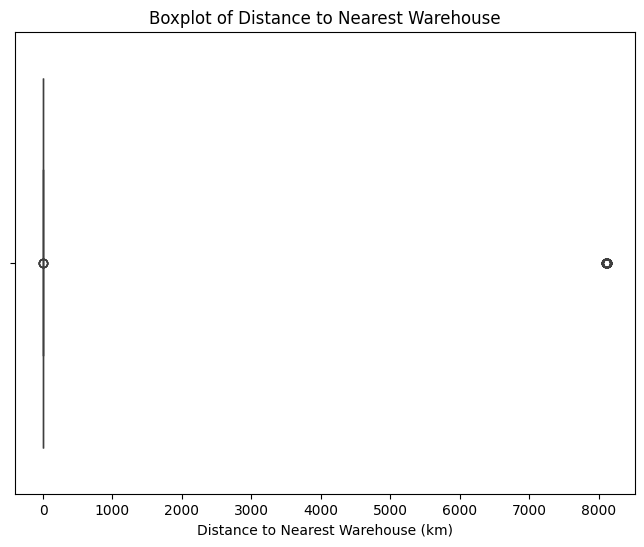

In [112]:
# Create a boxplot for 'distance_to_nearest_warehouse_chk'
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_distance['distance_to_nearest_warehouse_chk'])
plt.title('Boxplot of Distance to Nearest Warehouse')
plt.xlabel('Distance to Nearest Warehouse (km)')
plt.show()

We see that there are some extremely high values of more than 8000. We will need to investigate these values

In [113]:
df_distance_over_1000 = df_distance[df_distance['distance_to_nearest_warehouse_chk'] > 1000].copy()
print(df_distance_over_1000.shape)
df_distance_over_1000.head()

(27, 21)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk
20,ORD099560,ID1462398847,2019-02-11,Bakers,"[('Olivia x460', 2), ('Candle Inferno', 2), ('...",25660,104.65,145.013118,-37.820006,10,...,Summer,True,1.9276,bought it on sale for christmas gift and we'll...,True,8109.614144,8108.873348,8108.752454,Bakers,8108.7525
34,ORD426029,ID4740822072,2019-04-19,Thompson,"[('iStream', 1), ('Universe Note', 1), ('Toshi...",8780,67.60,144.949762,-37.803599,25,...,Autumn,False,1.0375,great phone great value i am very pleased with...,True,8116.601036,8115.860808,8115.738676,Bakers,8115.7387
63,ORD046719,ID1668523278,2019-05-05,Nickolson,"[('iAssist Line', 1), ('Toshika 750', 2), ('Un...",19945,78.03,144.962711,-37.821155,10,...,Autumn,True,0.6655,love it,True,8115.224941,8114.484184,8114.363206,Bakers,8114.3632
88,ORD111373,ID2200514710,2019-09-29,Nickolson,"[('Alcon 10', 1), ('Olivia x460', 2), ('Lucent...",13860,106.81,144.973537,-37.805365,5,...,Spring,True,1.5139,five stars i love this phone!,True,8113.963018,8113.222705,8113.100759,Bakers,8113.1008
91,ORD059400,ID3967630082,2019-08-11,Thompson,"[('pearTV', 2), ('Alcon 10', 1)]",21570,75.62,144.952517,-37.817918,0,...,Winter,True,0.7553,four stars it has worked well for me and is a ...,True,8116.346894,8115.606245,8115.485030,Bakers,8115.4850


Columns that are related to distance to nearest warehouse are 'customer_lat' and 'customer_long', thus we have a look into these columns

In [114]:
df_distance_over_1000[['customer_lat', 'customer_long']].head()

,customer_lat,customer_long
20,145.013118,-37.820006
34,144.949762,-37.803599
63,144.962711,-37.821155
88,144.973537,-37.805365
91,144.952517,-37.817918


We can see that they all have negative longitude and positive latitude which is suspicious since the online store we are working with based in Melbourne, so we expect customers are based in Southern hemisphere with negative customer_lat.

We will graph all the coordinates from original for visualisation

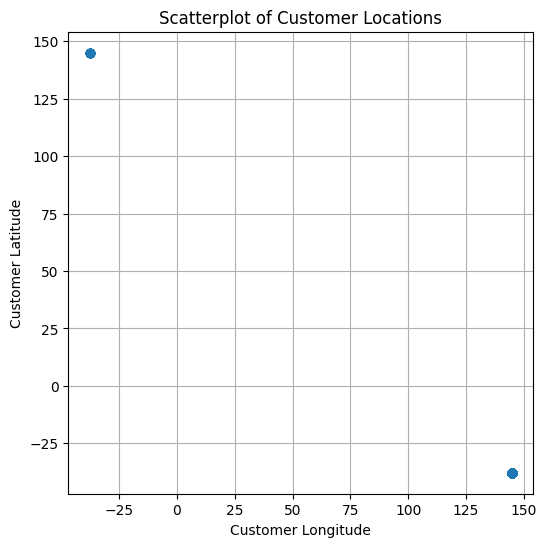

In [115]:
plt.figure(figsize=(6, 6))
plt.scatter(df['customer_long'], df['customer_lat'], alpha=0.5)
plt.xlabel('Customer Longitude')
plt.ylabel('Customer Latitude')
plt.title('Scatterplot of Customer Locations')
plt.grid(True)
plt.show()

In [116]:
# Check the descriptive statistics of customer_lat and customer_long in the whole dataframe
df[['customer_lat', 'customer_long']].describe()

,customer_lat,customer_long
count,500.000000,500.000000
mean,-27.942494,135.097171
std,41.352632,41.353405
min,-37.826512,-37.824514
25%,-37.818610,144.949324
50%,-37.812217,144.965259
75%,-37.805708,144.980528
max,145.013118,145.016421


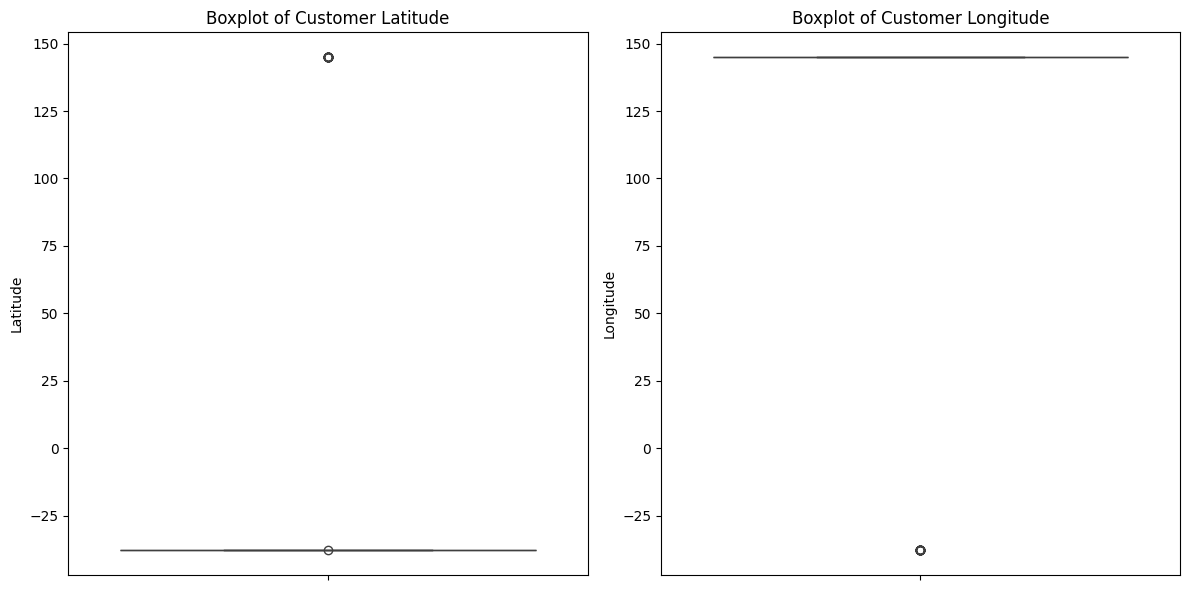

In [117]:
# Create a boxplot for 'customer_lat' and 'customer_long'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['customer_lat'])
plt.title('Boxplot of Customer Latitude')
plt.ylabel('Latitude')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['customer_long'])
plt.title('Boxplot of Customer Longitude')
plt.ylabel('Longitude')

plt.tight_layout()
plt.show()

From descriptive statistics and boxplots above, we can see that the instances where customer has postive latitude and negative longitude are outliers. The symestry accross y=x line in the scatterplot hinted us toward coordinates have been switched. In additions, there is only 1 possible fix, so we'll go with swap the coordinates back.

### Fix swapped longitude, latitude

In [118]:
# Record into issue dict
issue_dict['swapped_coordinates'] = df_distance_over_1000.index.tolist()
print(len(issue_dict['swapped_coordinates']))
print(issue_dict['swapped_coordinates'])

27
[20, 34, 63, 88, 91, 93, 119, 123, 144, 169, 196, 202, 215, 225, 233, 276, 282, 292, 368, 397, 402, 405, 438, 447, 460, 477, 494]


In [119]:
# Fix errors in our working dataframe
for index in issue_dict['swapped_coordinates']:
  df_distance.loc[index, 'customer_lat'], df_distance.loc[index, 'customer_long'] = df_distance.loc[index, 'customer_long'], df_distance.loc[index, 'customer_lat']

In [120]:
# Verify if the errors have been corrected
df_distance = check_distances_columns(df_distance, warehouses_df)

In [121]:
df_distance[df_distance['distance_to_nearest_warehouse_chk'] > 1000]

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk


We confirm that the errors have been successfully fixed

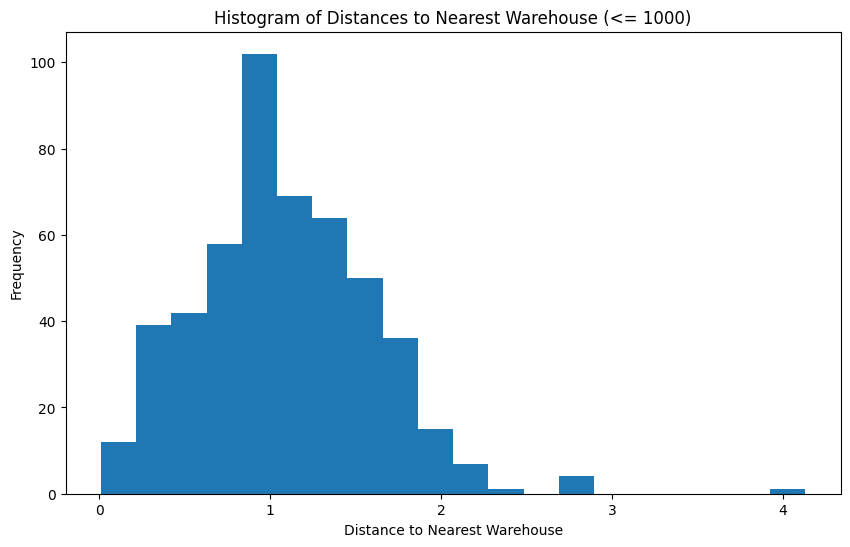

In [122]:
# Check the distribution of the rest of distance to nearest warehouse
df_within_1000 = df_distance[df_distance['distance_to_nearest_warehouse_chk'] <= 1000]

plt.figure(figsize=(10, 6))
plt.hist(df_within_1000['distance_to_nearest_warehouse_chk'], bins=20)
plt.xlabel('Distance to Nearest Warehouse')
plt.ylabel('Frequency')
plt.title('Histogram of Distances to Nearest Warehouse (<= 1000)')
plt.show()

There is nothing suspicious

#### Fix in original dataframe

In [123]:
for index in issue_dict['swapped_coordinates']:
  df.loc[index, 'customer_lat'], df.loc[index, 'customer_long'] = df.loc[index, 'customer_long'], df.loc[index, 'customer_lat']

### Check nearest_warehouse name

First, we look into rows where distance_to_nearest_warehouse matched with distance_to_nearest_warehouse_chk, but the nearest_warehouse names don't match

In [124]:
nearest_warehouse_name_error_df = df_distance[(df_distance['distance_to_nearest_warehouse'] == df_distance['distance_to_nearest_warehouse_chk']) & (df_distance['nearest_warehouse'] != df_distance['nearest_warehouse_chk'])]
print(nearest_warehouse_name_error_df.shape)
nearest_warehouse_name_error_df.head(3)

(27, 21)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk
14,ORD092168,ID6167413249,2019-08-03,bakers,"[('Olivia x460', 2), ('Alcon 10', 1)]",11400,62.38,-37.812194,144.970521,15,...,Winter,True,0.7176,i thought it was an upgrade wasn't very smart,False,0.717568,2.063091,2.186977,Nickolson,0.7176
23,ORD216391,ID1449316602,2019-01-14,bakers,"[('Universe Note', 1), ('Candle Inferno', 2)]",4310,95.18,-37.816678,144.987687,0,...,Summer,True,0.9968,"so good. phone was well packaged so far, so go...",True,1.609011,3.599667,0.996796,Bakers,0.9968
70,ORD457800,ID3215192044,2019-07-20,thompson,"[('Candle Inferno', 1), ('Olivia x460', 2), ('...",6630,75.57,-37.808390,144.947965,5,...,Winter,True,0.4833,great buy it’s a great buy.,True,2.212306,0.483288,4.160870,Thompson,0.4833


In this case, the name of nearest_warehouse is wrong and we will correct them accordingly.

In [125]:
# record to issue dict
issue_dict['wrong_name_of_nearest'] = nearest_warehouse_name_error_df.index.tolist()
print(len(issue_dict['wrong_name_of_nearest']))
print(issue_dict['wrong_name_of_nearest'])

27
[14, 23, 70, 87, 100, 142, 160, 199, 206, 220, 223, 235, 238, 263, 270, 273, 286, 293, 304, 305, 317, 337, 356, 413, 417, 457, 484]


In [126]:
# Check if there are any rows has both swapped_coordinates and wrong nearest_warehouse name
list(set(issue_dict['swapped_coordinates']) & set(issue_dict['wrong_name_of_nearest']))

[]

There are no overlapping rows

In [127]:
# Correct these rows in working dataframe
df_distance.loc[issue_dict['wrong_name_of_nearest'], 'nearest_warehouse'] = df_distance.loc[issue_dict['wrong_name_of_nearest'], 'nearest_warehouse_chk']

In [128]:
# Verify that we have fix it successfully
nearest_warehouse_name_error_df2 = df_distance[(df_distance['distance_to_nearest_warehouse'] == df_distance['distance_to_nearest_warehouse_chk']) & (df_distance['nearest_warehouse'] != df_distance['nearest_warehouse_chk'])]
print(nearest_warehouse_name_error_df2.shape)
nearest_warehouse_name_error_df2.head()

(0, 21)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk


We confirm that we fix the error

#### Fix in original dataframe

In [129]:
df.loc[issue_dict['wrong_name_of_nearest'], 'nearest_warehouse'] = df_distance.loc[issue_dict['wrong_name_of_nearest'], 'nearest_warehouse_chk']

### Fix distance_to_nearest_warehouse

In [130]:
distance_issue_df = df_distance[df_distance['distance_to_nearest_warehouse_chk'] != df_distance['distance_to_nearest_warehouse']]
print(distance_issue_df.shape)
distance_issue_df.head(3)

(27, 21)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk
5,ORD004722,ID1271016085,2019-05-09,Thompson,"[('pearTV', 1), ('Lucent 330S', 1), ('iAssist ...",11990,66.75,-37.816023,144.938303,5,...,Autumn,False,0.7848,its good thanks for all the xp lumia 900 i arr...,True,2.762728,0.856318,5.051207,Thompson,0.8563
35,ORD487145,ID3094966838,2019-03-26,Thompson,"[('Toshika 750', 1), ('Candle Inferno', 1)]",4750,81.26,-37.802439,144.948287,5,...,Autumn,True,1.0377,the inferno hd 8 is a nice improvement over th...,True,2.594548,1.144288,4.213679,Thompson,1.1443
47,ORD316684,ID2207661117,2019-09-12,Thompson,"[('Olivia x460', 2), ('Universe Note', 2), ('C...",12435,106.36,-37.800534,144.945887,0,...,Spring,True,1.0364,"phone may be okay, but camera is janky i retur...",True,2.893705,1.355348,4.465958,Thompson,1.3553


We assume that wrong distance are due to calculation, not due to wrong coordinates.

In [131]:
issue_dict['wrong_distance'] = distance_issue_df.index.tolist()
print(len(issue_dict['wrong_distance']))
print(issue_dict['wrong_distance'])

27
[5, 35, 47, 56, 68, 83, 101, 212, 227, 232, 234, 236, 265, 291, 295, 320, 322, 344, 347, 361, 370, 374, 389, 399, 458, 470, 485]


In [132]:
# Fix in working dataframe
df_distance.loc[issue_dict['wrong_distance'], 'distance_to_nearest_warehouse'] = df_distance.loc[issue_dict['wrong_distance'], 'distance_to_nearest_warehouse_chk']

In [133]:
# Verify the fix
distance_issue_df2 = df_distance[df_distance['distance_to_nearest_warehouse_chk'] != df_distance['distance_to_nearest_warehouse']]
print(distance_issue_df2.shape)
distance_issue_df2.head()

(0, 21)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk


#### Fix in original dataframe

In [134]:
df.loc[issue_dict['wrong_distance'], 'distance_to_nearest_warehouse'] = df_distance.loc[issue_dict['wrong_distance'], 'distance_to_nearest_warehouse_chk']

In [135]:
total_count = 0
for val in issue_dict.values():
  total_count += len(val)
print(total_count)

243


## Regression for delivery charge

In [136]:
def calculate_regression_and_show(df, formula):

  # Fit the model
  model = sm.ols(formula, data=df).fit()

  # Print the summary of the model
  print(model.summary())

  # Predict delivery charges using the fitted model
  df['predicted_delivery_charges'] = model.predict(df)

  # Create a scatter plot of predicted vs. actual delivery charges
  plt.figure(figsize=(10, 6))
  plt.scatter(df['delivery_charges'], df['predicted_delivery_charges'])
  plt.xlabel('Actual Delivery Charges')
  plt.ylabel('Predicted Delivery Charges')
  plt.title('Predicted vs. Actual Delivery Charges')
  plt.plot([df['delivery_charges'].min(), df['delivery_charges'].max()], [df['delivery_charges'].min(), df['delivery_charges'].max()], 'k--', lw=2)  # Add a diagonal line for reference

  plt.show()
  return model, df

In [137]:
def graph_residuals(model_name, model, df):
    # Calculate the residuals
    residuals = model.resid

    # Create subplots: 1 row, 2 columns
    fig, axs = plt.subplots(1, 2, figsize=(10, 6))

    # Plot the distribution of residuals in the first subplot
    sns.histplot(residuals, kde=True, ax=axs[0])
    axs[0].set_xlabel('Residuals')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Distribution of Model Residuals')

    # Q-Q plot in the second subplot
    stats.probplot(residuals, dist="norm", plot=axs[1])
    axs[1].set_title("Q-Q Plot of Residuals")

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

    # Perform Shapiro-Wilk test on residuals
    shapiro_test_residuals = stats.shapiro(residuals)
    print("Shapiro-Wilk Test for Residuals:")
    print(f"Test Statistic: {shapiro_test_residuals.statistic}")
    print(f"P-value: {shapiro_test_residuals.pvalue}")

    if shapiro_test_residuals.pvalue > 0.05:
        print("The residuals are likely normally distributed (fail to reject H0).")
    else:
        print("The residuals are not likely normally distributed (reject H0).")

In [138]:
def corrected_observations_list(issue_dict):
    """
    Create a list of corrected observations from an issue dictionary and ensure no duplicates.

    This function takes a dictionary (`issue_dict`) where keys represent different types of issues,
    and values are lists of observations associated with those issues. It iterates through the
    dictionary and compiles a list of all unique corrected observations. If an observation has
    already been corrected (i.e., it's already in the list), an exception is raised to avoid
    duplication errors.

    Args:
        issue_dict (dict): Dictionary where keys represent issue types and values are lists of
                           observations that need correction.

    Returns:
        list: A list of unique corrected observations.

    Raises:
        Exception: If an observation has already been added to the corrected observations list.
    """

    corrected_observations = []  # List to store unique corrected observations

    count = 0  # Counter (currently unused but could track how many corrections are made)

    # Iterate through each key (issue type) in the dictionary
    for k in issue_dict.keys():
        # Iterate through each observation under the current issue type
        for i in issue_dict[k]:
            # Check if the observation has already been corrected
            if i in corrected_observations:
                raise Exception(f"Observation {i} already corrected")  # Raise an error if duplicate found

            corrected_observations.append(i)  # Add the observation to the corrected list

    return corrected_observations  # Return the list of unique corrected observations

In [139]:
corrected_observations = corrected_observations_list(issue_dict)

In [140]:
# We have one uncorrected row with issue with season
# We can not use this observation to build a regression
for item in unsure_season_correction_lst:
  if item in corrected_observations:
    corrected_observations.remove(item)


In [141]:
def print_issue_dict(issue_dict):
  for k in issue_dict.keys():
    str_ = '['+', '.join(map(str, issue_dict[k]))+']'
    print(f"{k}:\t\t\t {str_}" )

print_issue_dict(issue_dict)

wrong_dates:			 [54, 97, 110, 112, 113, 126, 129, 155, 168, 170, 194, 197, 244, 283, 309, 313, 342, 352, 365, 384, 388, 398, 400, 421, 428, 464, 473]
wrong_season:			 [11, 12, 18, 32, 57, 92, 94, 105, 132, 183, 189, 213, 246, 251, 252, 259, 272, 311, 351, 357, 373, 390, 391, 393, 410, 486, 490]
wrong_is_happy_score:			 [8, 30, 64, 90, 98, 186, 210, 228, 237, 245, 254, 257, 267, 280, 285, 299, 303, 318, 325, 335, 336, 339, 371, 409, 443, 482, 497]
wrong_order_price:			 [2, 7, 9, 39, 66, 72, 82, 111, 130, 135, 148, 158, 159, 175, 207, 219, 242, 274, 298, 330, 386, 396, 414, 456, 463, 468, 493]
wrong_shopping_cart:			 [13, 24, 76, 79, 89, 99, 134, 137, 149, 166, 182, 191, 198, 200, 205, 211, 226, 255, 281, 289, 308, 379, 406, 408, 444, 449, 466]
wrong_order_total:			 [4, 22, 53, 69, 77, 78, 81, 96, 117, 140, 152, 163, 167, 216, 240, 290, 306, 314, 319, 321, 345, 358, 359, 364, 381, 472, 476]
swapped_coordinates:			 [20, 34, 63, 88, 91, 93, 119, 123, 144, 169, 196, 202, 215, 225, 233, 276,

In [142]:
df_reg = df.copy()

In [143]:
df_reg = pd.concat([df_reg, df_date['season_check']], axis=1)

In [144]:
df_reg

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,season_check
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,20570.95,Autumn,True,1.1454,excellent excellent,True,Autumn
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,24471.92,Summer,False,0.7287,five stars very satisfied,True,Summer
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,2273.90,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False,Winter
3,ORD010967,ID0838386042,2019-03-02,Thompson,"[('Lucent 330S', 2), ('Universe Note', 2), ('p...",26430,79.98,-37.802826,144.947994,0,26509.98,Autumn,True,1.0992,will it last? it is new and working great. sha...,True,Autumn
4,ORD289291,ID6167413244,2019-01-16,Nickolson,"[('Lucent 330S', 2), ('Universe Note', 1), ('i...",10360,93.05,-37.811745,144.972083,5,9935.05,Summer,True,0.7944,,True,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD342184,ID1404218659,2019-07-13,Bakers,"[('Thunder line', 2), ('Universe Note', 2), ('...",13915,66.78,-37.801650,144.987427,25,10503.03,Winter,False,1.1552,five stars great for a flip phone.,True,Winter
496,ORD237577,ID2501490564,2019-09-19,Bakers,"[('Universe Note', 2), ('Toshika 750', 1), ('L...",30350,63.51,-37.811671,144.983031,5,28896.01,Spring,False,1.0891,never worked never worked,False,Spring
497,ORD020686,ID6167489443,2019-12-06,Nickolson,"[('Universe Note', 1), ('Thunder line', 1)]",5630,60.29,-37.813155,144.959694,25,4282.79,Summer,False,1.0574,one star motherboard died after 6 weeks. unrep...,False,Summer
498,ORD487614,ID0529205069,2019-01-28,Thompson,"[('pearTV', 1), ('Alcon 10', 1)]",15260,81.04,-37.823397,144.935580,0,15341.04,Summer,False,1.5639,great phone! i just got this phone a couple da...,True,Summer


In [145]:
# Create dummy variables for the 'season' column
season_dummies = pd.get_dummies(df_reg['season'], prefix='')

# Concatenate the dummy variables with the original DataFrame
df_reg = pd.concat([df_reg, season_dummies], axis=1)

# Print the updated DataFrame to verify the encoding
df_reg.head(3)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,season_check,_Autumn,_Spring,_Summer,_Winter
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,...,Autumn,True,1.1454,excellent excellent,True,Autumn,True,False,False,False
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,...,Summer,False,0.7287,five stars very satisfied,True,Summer,False,False,True,False
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,...,Winter,True,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False,Winter,False,False,False,True


In [146]:
df_corrected = df_reg.loc[corrected_observations]

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3045.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          2.39e-251
Time:                        11:20:16   Log-Likelihood:                -343.96
No. Observations:                 242   AIC:                             719.9
Df Residuals:                     226   BIC:                             775.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

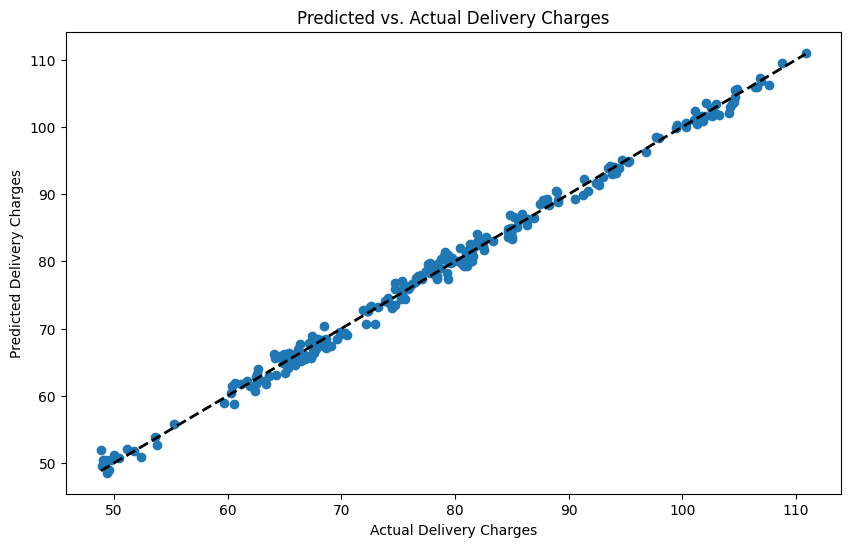

In [147]:
# Define the formula for the multiple linear regression
formula = 'delivery_charges ~ distance_to_nearest_warehouse + is_expedited_delivery + is_happy_customer +\
           _Spring + _Summer + _Autumn + distance_to_nearest_warehouse*_Spring + distance_to_nearest_warehouse*_Summer + distance_to_nearest_warehouse*_Autumn +\
           is_expedited_delivery*_Spring + is_expedited_delivery*_Summer + is_expedited_delivery*_Autumn + \
           is_happy_customer*_Spring + is_happy_customer*_Summer + is_happy_customer*_Autumn'

# Fit the model
model = sm.ols(formula, data=df_corrected).fit()

# Print the summary of the model
print(model.summary())

# Predict delivery charges using the fitted model
df_corrected['predicted_delivery_charges'] = model.predict(df_corrected)

# Create a scatter plot of predicted vs. actual delivery charges
plt.figure(figsize=(10, 6))
plt.scatter(df_corrected['delivery_charges'], df_corrected['predicted_delivery_charges'])
plt.xlabel('Actual Delivery Charges')
plt.ylabel('Predicted Delivery Charges')
plt.title('Predicted vs. Actual Delivery Charges')
plt.plot([df_corrected['delivery_charges'].min(), df_corrected['delivery_charges'].max()], [df_corrected['delivery_charges'].min(), df_corrected['delivery_charges'].max()], 'k--', lw=2)  # Add a diagonal line for reference

plt.show()

We see that is_customer_happy has a very high p-value. we'll do Wilks test to ensure that season does not influent on is_happy_customer contribution to delivery charge

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     3823.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          2.92e-256
Time:                        11:20:16   Log-Likelihood:                -345.03
No. Observations:                 242   AIC:                             716.1
Df Residuals:                     229   BIC:                             761.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

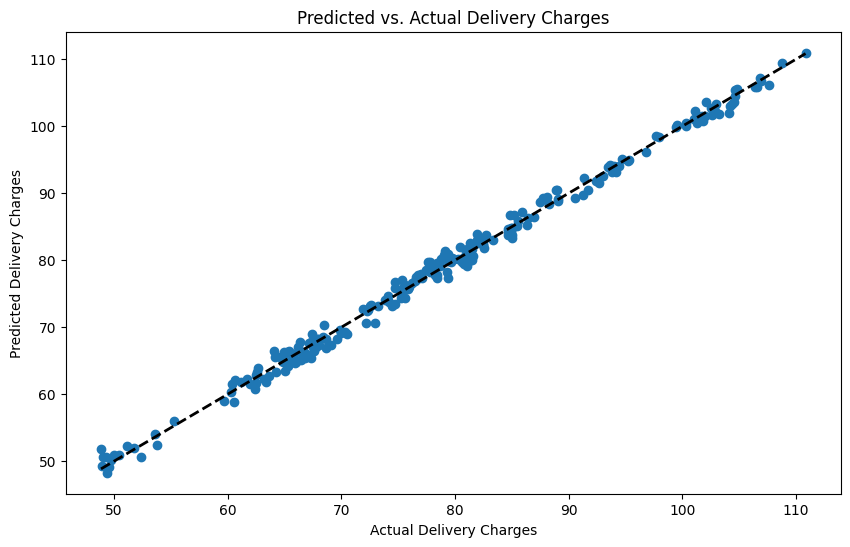

Likelihood Ratio Test:
Test statistic: 2.1377881800243586
Degrees of freedom: 3.0
p-value: 0.5443058654894193


In [148]:
# Perform Wilks' Lambda test (also known as the likelihood ratio test)
# This compares the full model (with all predictors) to a reduced model (with fewer predictors)
# In this case, we compare the full model to a model with only the intercept

reduced_formula = 'delivery_charges ~ distance_to_nearest_warehouse + is_expedited_delivery + is_happy_customer +\
           _Spring + _Summer + _Autumn + distance_to_nearest_warehouse*_Spring + distance_to_nearest_warehouse*_Summer + distance_to_nearest_warehouse*_Autumn +\
           is_expedited_delivery*_Spring + is_expedited_delivery*_Summer + is_expedited_delivery*_Autumn'

# Extract the log-likelihood of the full model
full_loglikelihood = model.llf

# Create a reduced model with only the intercept
reduced_model_, df_corrected = calculate_regression_and_show(df_corrected, reduced_formula)
reduced_loglikelihood = reduced_model_.llf

# Calculate the likelihood ratio test statistic
likelihood_ratio = -2 * (reduced_loglikelihood - full_loglikelihood)

# Calculate the degrees of freedom
df_full = model.df_model
df_reduced = reduced_model_.df_model
df_diff = df_full - df_reduced


# Calculate the p-value using the chi-squared distribution

p_value = chi2.sf(likelihood_ratio, df_diff)

print("Likelihood Ratio Test:")
print(f"Test statistic: {likelihood_ratio}")
print(f"Degrees of freedom: {df_diff}")
print(f"p-value: {p_value}")

This LR-test or Wilks' Lambda test has null hypothesis that coefficients with following independent variables are equal to null:
- is_happy_customer*_Spring,
- is_happy_customer*:_Summer,
- is_happy_customer*:_Autumn

We can not reject the null hypothesis.

So the reduced model is close to the real dependency

In [149]:
# Define the formula for the linear regression
formula_short = 'delivery_charges ~ predicted_delivery_charges'

# Fit the model
model_short = sm.ols(formula_short, data=df_corrected).fit()

# Print the summary of the model
print(model_short.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.808e+04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.76e-278
Time:                        11:20:17   Log-Likelihood:                -345.03
No. Observations:                 242   AIC:                             694.1
Df Residuals:                     240   BIC:                             701.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [150]:
residuals = model_short.resid
standard_deviation_of_error = np.std(residuals)
print("Standard Deviation of Error:", standard_deviation_of_error)

Standard Deviation of Error: 1.0068288540388597


In [151]:
significance_level = 0.001
z_score = norm.ppf(1 - significance_level / 2)
print(f"The z-score for a {significance_level*100}% two-tailed confidence interval is: {z_score}")


The z-score for a 0.1% two-tailed confidence interval is: 3.2905267314919255


In [152]:
critical_value = z_score * standard_deviation_of_error
print("Critical Value:", critical_value)

Critical Value: 3.31299725825225


In [153]:
significance_level_chk = 0.05
z_score_chk = norm.ppf(1 - significance_level_chk / 2)
critical_value_chk = z_score_chk * standard_deviation_of_error
print("Critical Value:", critical_value_chk)

Critical Value: 1.9733482925119


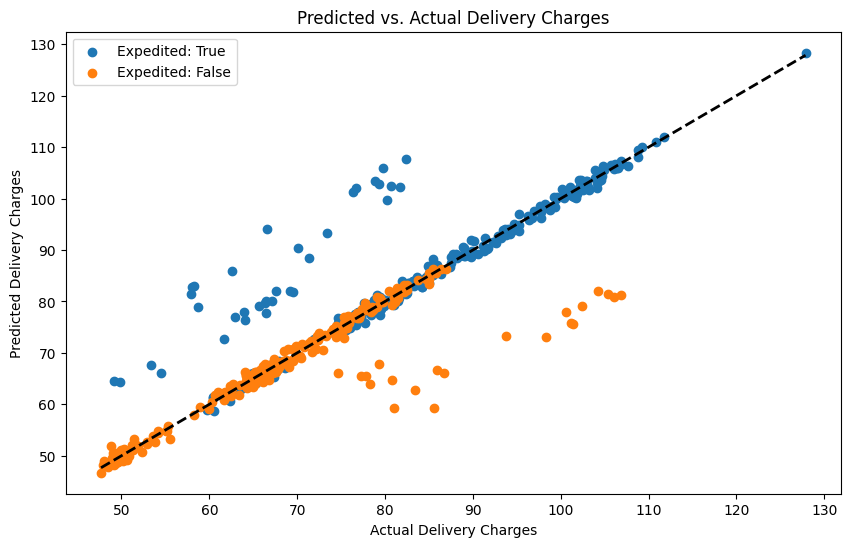

In [154]:
df_reg['predicted_delivery_charges'] = model.predict(df_reg)

# Create a scatter plot of predicted vs. actual delivery charges
plt.figure(figsize=(10, 6))

for expedited in df_reg['is_expedited_delivery'].unique():
    df_reg_expedited = df_reg[df_reg['is_expedited_delivery'] == expedited]
    plt.scatter(df_reg_expedited['delivery_charges'], df_reg_expedited['predicted_delivery_charges'], label=f'Expedited: {expedited}')

plt.xlabel('Actual Delivery Charges')
plt.ylabel('Predicted Delivery Charges')
plt.title('Predicted vs. Actual Delivery Charges')
plt.plot([df_reg['delivery_charges'].min(), df_reg['delivery_charges'].max()],
         [df_reg['delivery_charges'].min(), df_reg['delivery_charges'].max()], 'k--', lw=2)  # Add a diagonal line for reference

# Add the legend
plt.legend()

plt.show()

In [155]:
df_reg['diff_charge'] = abs(df_reg['predicted_delivery_charges'] - df_reg['delivery_charges'])
df_reg.head(3)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,season_check,_Autumn,_Spring,_Summer,_Winter,predicted_delivery_charges,diff_charge
0,ORD140525,ID1463620894,2019-04-06,Bakers,"[('pearTV', 2), ('Alcon 10', 1)]",21570,79.45,-37.818897,145.001768,5,...,1.1454,excellent excellent,True,Autumn,True,False,False,False,80.475573,1.025573
1,ORD399387,ID1327054087,2019-02-04,Nickolson,"[('Toshika 750', 1), ('Thunder line', 1), ('Al...",24400,71.92,-37.813576,144.964231,0,...,0.7287,five stars very satisfied,True,Summer,False,False,True,False,71.982717,0.062717
2,ORD296189,ID2189145408,2019-08-06,Thompson,"[('Thunder line', 1), ('iStream', 1)]",2330,60.40,-37.811758,144.956521,5,...,0.8375,not unlocked this phone is not unlocked!!!!!! ...,False,Winter,False,False,False,True,61.469353,1.069353


In [156]:
# Define the formula for the linear regression
formula_short = 'delivery_charges ~ predicted_delivery_charges'

# Fit the model
model_short = sm.ols(formula_short, data=df_corrected).fit()

# Print the summary of the model
print(model_short.summary())

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 4.808e+04
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          1.76e-278
Time:                        11:20:18   Log-Likelihood:                -345.03
No. Observations:                 242   AIC:                             694.1
Df Residuals:                     240   BIC:                             701.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [157]:
significance_level = 0.001

residuals = model_short.resid
standard_deviation_of_error = np.std(residuals)
print("Standard Deviation of Error:", standard_deviation_of_error)

z_score = norm.ppf(1 - significance_level / 2)
print(f"The z-score for a {significance_level*100}% two-tailed confidence interval is: {z_score}")

critical_value = z_score * standard_deviation_of_error
print("Critical Value:", critical_value)

Standard Deviation of Error: 1.0068288540388597
The z-score for a 0.1% two-tailed confidence interval is: 3.2905267314919255
Critical Value: 3.31299725825225


In [158]:
df_ = df_reg[abs(df_reg['predicted_delivery_charges'] - df_reg['delivery_charges']) > critical_value]
print(df_.shape)
df_.head(3)

(55, 23)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,season_check,_Autumn,_Spring,_Summer,_Winter,predicted_delivery_charges,diff_charge
21,ORD103576,ID0635493548,2019-03-18,Thompson,"[('Toshika 750', 1), ('pearTV', 2), ('iStream'...",17240,80.75,-37.814064,144.939691,0,...,0.6670,restricted use outside of us buttons tough to ...,True,Autumn,True,False,False,False,64.770765,15.979235
26,ORD135699,ID1449431615,2019-10-28,Nickolson,"[('pearTV', 2), ('iStream', 2), ('Toshika 750'...",21600,100.59,-37.812610,144.977616,5,...,0.9731,fantastic received and set it up pretty quickl...,True,Spring,False,True,False,False,78.035862,22.554138
40,ORD426809,ID0589398318,2019-06-12,Nickolson,"[('Thunder line', 2), ('iStream', 1), ('Toshik...",16600,64.09,-37.812637,144.974085,10,...,0.7738,can be used in two countries this product is v...,True,Winter,False,False,False,True,76.335488,12.245488



These rows contain errors in either 'expedited_delivery' or 'season' (season instances where we are not sure of in the beginning.

We will take those rows out and see how many rows have are in the problem with season list (in issue_dict), then we correct the season. After that we will check re-run the regression and correct is_expedited delivery.

In [159]:
problem_with_expedited_deli = df_.index.tolist()
print(len(problem_with_expedited_deli))
print(problem_with_expedited_deli)

55
[21, 26, 40, 41, 43, 50, 51, 55, 57, 60, 74, 75, 109, 114, 125, 128, 133, 139, 143, 150, 171, 174, 177, 184, 195, 218, 222, 229, 243, 253, 258, 264, 278, 287, 288, 323, 326, 327, 341, 360, 367, 376, 382, 404, 407, 416, 419, 437, 441, 452, 453, 454, 465, 479, 492]


Let's check if among our outliers there are unsolved issues with seasons

In [160]:
for item in unsure_season_correction_lst:
  if item in problem_with_expedited_deli:
    print(f"Item {item} has problem with season")
  else:
    print(f"Item {item} has problem with date")
  problem_with_expedited_deli.remove(item)


Item 57 has problem with season


In [161]:
df_reg.loc[unsure_season_correction_lst[0], ]

,57
order_id,ORD164648
customer_id,ID1449308623
date,2019-01-08
nearest_warehouse,Bakers
shopping_cart,"[('Toshika 750', 2), ('iAssist Line', 1), ('iS..."
order_price,18065
delivery_charges,74.65
customer_lat,-37.81657
customer_long,144.98698
coupon_discount,10


In [162]:
# Correct the 'season' for those rows
df_date.loc[unsure_season_correction_lst, 'season'] = df_date.loc[unsure_season_correction_lst, 'season_check']
df_reg.loc[unsure_season_correction_lst, 'season'] = df_reg.loc[unsure_season_correction_lst, 'season_check']
df_reg.loc[unsure_season_correction_lst[0], "_Winter"] = False
df_reg.loc[unsure_season_correction_lst[0], "_Summer"] = True


# Now, check if any mismatches are left.
filt_match_season = df_date['season_check'] != df_date['season']
print(f"Number of rows where season does not match the season name from the date: {filt_match_season.sum()}")
df_date.loc[filt_match_season, ['season', 'season_check', 'date', 'date_dt']]

Number of rows where season does not match the season name from the date: 0


,season,season_check,date,date_dt


In [163]:
# Correct the row in original dataframe
df['season'] = df_date['season']

Other rows will definitely have problems with delivery_charge since we have corrected all other errors, and we can see in the regression visualisation that the cluster of points on each side of the regression line have the same value for 'is_exepedited_delivery'

In [164]:
# Record to issue_dict
issue_dict['is_expedited_delivery'] = problem_with_expedited_deli
print(len(issue_dict['is_expedited_delivery']))
print(issue_dict['is_expedited_delivery'])

54
[21, 26, 40, 41, 43, 50, 51, 55, 60, 74, 75, 109, 114, 125, 128, 133, 139, 143, 150, 171, 174, 177, 184, 195, 218, 222, 229, 243, 253, 258, 264, 278, 287, 288, 323, 326, 327, 341, 360, 367, 376, 382, 404, 407, 416, 419, 437, 441, 452, 453, 454, 465, 479, 492]


In [165]:
# Correct these rows in working dataframe
df_reg.loc[problem_with_expedited_deli, 'is_expedited_delivery'] = ~df_reg.loc[problem_with_expedited_deli, 'is_expedited_delivery']

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     9944.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:18   Log-Likelihood:                -694.31
No. Observations:                 500   AIC:                             1415.
Df Residuals:                     487   BIC:                             1469.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

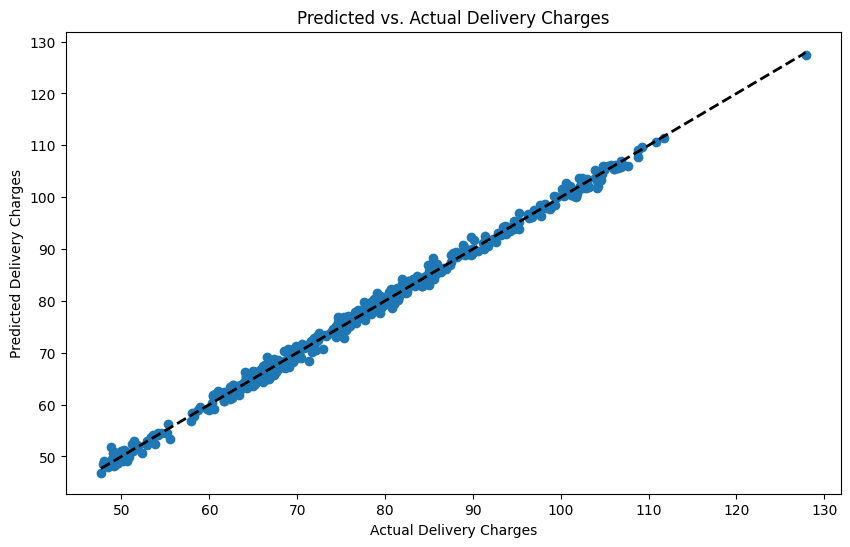

In [166]:
a, b = calculate_regression_and_show(df_reg, reduced_formula)

Now our model looks good with R2

## Conclusion

So we have fixed errors in all possible columns and achieve an R2 of 0.99 in the regression model.

In [167]:
print_issue_dict(issue_dict)

wrong_dates:			 [54, 97, 110, 112, 113, 126, 129, 155, 168, 170, 194, 197, 244, 283, 309, 313, 342, 352, 365, 384, 388, 398, 400, 421, 428, 464, 473]
wrong_season:			 [11, 12, 18, 32, 57, 92, 94, 105, 132, 183, 189, 213, 246, 251, 252, 259, 272, 311, 351, 357, 373, 390, 391, 393, 410, 486, 490]
wrong_is_happy_score:			 [8, 30, 64, 90, 98, 186, 210, 228, 237, 245, 254, 257, 267, 280, 285, 299, 303, 318, 325, 335, 336, 339, 371, 409, 443, 482, 497]
wrong_order_price:			 [2, 7, 9, 39, 66, 72, 82, 111, 130, 135, 148, 158, 159, 175, 207, 219, 242, 274, 298, 330, 386, 396, 414, 456, 463, 468, 493]
wrong_shopping_cart:			 [13, 24, 76, 79, 89, 99, 134, 137, 149, 166, 182, 191, 198, 200, 205, 211, 226, 255, 281, 289, 308, 379, 406, 408, 444, 449, 466]
wrong_order_total:			 [4, 22, 53, 69, 77, 78, 81, 96, 117, 140, 152, 163, 167, 216, 240, 290, 306, 314, 319, 321, 345, 358, 359, 364, 381, 472, 476]
swapped_coordinates:			 [20, 34, 63, 88, 91, 93, 119, 123, 144, 169, 196, 202, 215, 225, 233, 276,

In [168]:
original_df = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group044/Group044_dirty_data.csv')

In [169]:
def extract_name(line):
  """
  Function to extract the brand names from the string
  """
  names = []
  line = line.replace('[', '')
  line = line.replace(']', '')
  splitted_line = line.split(';')
  result = []
  pattern = r"\(\'([a-zA-Z0-9 ]+)\', ([0-9]+)\)"
  for order in splitted_line:
    matches = re.findall(pattern, order)
    lst = []
    for m in matches:
      names.append(m[0])
    result.append(lst)
  names = list(set(names))
  return names

In [170]:
def correct_shopping_cart_(row):
    """
    Corrects brand names in a shopping cart by adjusting wrong name by the correct one keeping the order and quantities the same.

    Args:
        row: A row from the dataset

    Returns: corrected shopping cart string
    """
    global counter
    #print(row['shopping_cart'])
    #print(row['corrected_cart_dict'])
    shopping_cart_str = str(row['shopping_cart'])
    brand_to_be_replaced = extract_name(shopping_cart_str)
    replacing_brand = ''
    for brand in row['corrected_cart_dict'].keys():
      if brand not in brand_to_be_replaced:
        #print(f"Brand '{brand}' did not found in the original shopping cart")
        replacing_brand = brand
        counter += 1
      else:
        brand_to_be_replaced.remove(brand)
    if len(brand_to_be_replaced) > 0:
      #print(f"Brand '{brand_to_be_replaced[0]}' should be replaced")
      shopping_cart_str = shopping_cart_str.replace(brand_to_be_replaced[0], replacing_brand)
    return shopping_cart_str

In [171]:
counter = 0
a = correct_shopping_cart_(df_cart.loc[13,])
a

"[('Toshika 750', 2), ('Alcon 10', 1)]"

In [172]:
counter = 0
df_test = df_cart.copy()

df_test['corrected_cart_string'] = df_test.apply(
    lambda row: correct_shopping_cart_(row),
    axis=1
)
print(counter)

27


In [173]:
def correct_row(original_df, corrected_df, column_name, indices_to_correct, function_to_correct = None):
  a = original_df[column_name] != corrected_df[column_name]
  print(f"Number of rows with different values in {column_name} column: {a.sum()}")
  if function_to_correct is None:
    original_df.loc[indices_to_correct, column_name] = corrected_df.loc[indices_to_correct, column_name]
  else:
    original_df.loc[indices_to_correct, column_name] = corrected_df.loc[indices_to_correct, column_name].apply(function_to_correct)
  return original_df



In [174]:

for k in issue_dict.keys():
  if k == 'wrong_dates':
    original_df = correct_row(original_df, df_reg, 'date', issue_dict['wrong_dates'])
  elif k == 'wrong_season':
    original_df = correct_row(original_df, df_reg, 'season', issue_dict['wrong_season'])
  elif k == 'wrong_is_happy_score':
    original_df = correct_row(original_df, df_reg, 'is_happy_customer', issue_dict['wrong_is_happy_score'])
  elif k == 'wrong_order_price':
    original_df = correct_row(original_df, df_reg, 'order_price', issue_dict['wrong_order_price'])
  elif k == 'wrong_order_total':
    original_df = correct_row(original_df, df_reg, 'order_total', issue_dict['wrong_order_total'])
  elif k == 'wrong_name_of_nearest':
    original_df = correct_row(original_df, df_reg, 'nearest_warehouse', issue_dict['wrong_name_of_nearest'])
  elif k == 'wrong_distance':
    original_df = correct_row(original_df, df_reg, 'distance_to_nearest_warehouse', issue_dict['wrong_distance'])
  elif k == 'is_expedited_delivery':
    original_df = correct_row(original_df, df_reg, 'is_expedited_delivery', issue_dict['is_expedited_delivery'])
  elif k == 'swapped_coordinates':
    original_df = correct_row(original_df, df_reg, 'customer_lat', issue_dict['swapped_coordinates'])
    original_df = correct_row(original_df, df_reg, 'customer_long', issue_dict['swapped_coordinates'])
  elif k == 'wrong_shopping_cart':
    counter = 0
    original_df.loc[issue_dict[k], 'shopping_cart'] = df_cart.loc[issue_dict[k], :].apply(lambda row: correct_shopping_cart_(row), axis=1)
    print(f"Number of rows with different values in shopping_cart column: {counter}")


Number of rows with different values in date column: 27
Number of rows with different values in season column: 27
Number of rows with different values in is_happy_customer column: 27
Number of rows with different values in order_price column: 27
Number of rows with different values in shopping_cart column: 27
Number of rows with different values in order_total column: 27
Number of rows with different values in customer_lat column: 27
Number of rows with different values in customer_long column: 27
Number of rows with different values in nearest_warehouse column: 27
Number of rows with different values in distance_to_nearest_warehouse column: 27
Number of rows with different values in is_expedited_delivery column: 54


In [175]:
original_df.to_csv('Group044_dirty_data_solution.csv', index = False)

# Handling missing data

In [176]:
# Load missing dataframe
df_missing = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group044/Group044_missing_data.csv')
df_missing.head(3)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD037945,ID0163642887,2019-06-14,Nickolson,"[('Lucent 330S', 2), ('iAssist Line', 1)]",4685.0,65.98,-37.820438,144.960317,25,3579.73,Winter,False,0.8375,"ok phone phone sometimes freezes up,otherwise ...",1.0
1,ORD344546,ID6167266592,2019-05-06,Nickolson,"[('Lucent 330S', 1), ('pearTV', 2), ('iAssist ...",NaN,65.84,-37.809675,144.964029,15,NaN,Autumn,False,1.1053,i love my phone delivery was on spot to what w...,1.0
2,ORD037505,ID0593475965,2019-03-14,Nickolson,"[('pearTV', 1), ('Toshika 750', 2)]",14950.0,67.72,-37.810542,144.963598,5,14270.22,Autumn,False,1.0381,five stars nice,1.0


In [177]:
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,55
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


In [178]:
# Check if there are any rows with more than 1 missing data (>=2)
rows_with_multiple_missing = df_missing[df_missing.isnull().sum(axis=1) >= 2]

if not rows_with_multiple_missing.empty:
  print(f"There are {rows_with_multiple_missing.shape[0]} rows with 2 or more missing data.")
else:
  print("There are no rows with 2 or more missing data.")

There are 46 rows with 2 or more missing data.


In [179]:
# Create a copy of orginal data frame to preserve original data
df_missing_original = df_missing.copy()

## Fill missing data in is_happy_customer

In [180]:
sia = SentimentIntensityAnalyzer()

In [181]:
def is_happy_based_on_review(review, sia, threshold=0.00):
    """
    Determine if a customer review expresses positive sentiment based on a given threshold.

    This function analyzes the sentiment of a customer review using the VADER Sentiment Intensity Analyzer (`sia`).
    If the compound sentiment score of the review is greater than or equal to the given threshold, it returns 1.0 (indicating positive sentiment).
    Otherwise, it returns 0.0 (indicating negative or neutral sentiment).

    If the review is None, an empty string, or NaN, the function returns NaN.

    Args:
        review (str): The text of the customer review.
        sia (SentimentIntensityAnalyzer): An instance of the VADER Sentiment Intensity Analyzer to score sentiment.
        threshold (float, optional): The sentiment threshold for determining positive sentiment. Defaults to 0.00.

    Returns:
        float: Returns 1.0 if the review has a sentiment score greater than or equal to the threshold,
               0.0 if below the threshold, and NaN if the review is None, empty, or NaN.
    """

    # Return NaN if the review is None, empty, or NaN
    if review is None or review == '' or review is np.nan:
        return np.nan

    # Calculate the sentiment scores for the review
    scores = sia.polarity_scores(review)

    # Return 1.0 if the compound score is above or equal to the threshold, otherwise return 0.0
    return 1.0 if scores['compound'] >= threshold else 0.0

In [182]:
# Create a copy of original dataframe to work on
df_sentiment = df_missing.copy()

We are unsure of what threshhold to use for sentiment analysis. In the previous task, we choose threshhold to be 0.05. In this task, we will test to see what is the optimal threshhold which minimise the number of wrong classifications. We expect the number of wrong classification to be zero as there are only missing data in this dataframe

#### Find the correct threshhold

In [183]:
x = [i/100 - 0.25 for i in range(100)]
y = []
for threshold in x:
  df_sentiment['sentiment_check'] = df_sentiment['latest_customer_review'].apply(lambda x: is_happy_based_on_review(str(x), sia, threshold=threshold))
  rows_with_discrepancy = df_sentiment[(df_sentiment['is_happy_customer'] != df_sentiment['sentiment_check']) & (~df_sentiment['is_happy_customer'].isnull())]
  y.append(rows_with_discrepancy.shape[0])

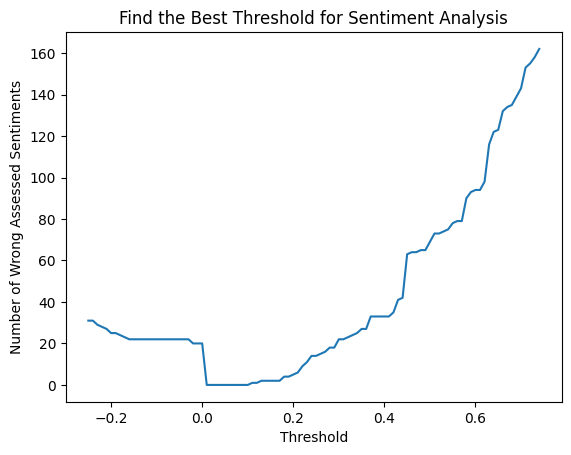

In [184]:
plt.plot(x, y)
plt.xlabel('Threshold')
plt.ylabel('Number of Wrong Assessed Sentiments')
plt.title('Find the Best Threshold for Sentiment Analysis')
plt.show()

In [185]:
min_x = float('inf')
max_x = float('-inf')
for i in range(len(y)):
  if y[i] == 0:
    if x[i] < min_x:
      min_x = x[i]
    if x[i] > max_x:
      max_x = x[i]

if min_x == float('inf') or max_x == float('-inf'):
  print("No interval found where y == 0")
else:
  print(f"Interval where y == 0 is approximately: [{min_x:.2f}, {max_x:.2f}]")

Interval where y == 0 is approximately: [0.01, 0.10]


We will pick a threshhold between 0.01 and 0.10. Let's pick 0.05

In [186]:
nan_indices_happy = df_missing[df_missing['is_happy_customer'].isnull()].index.tolist()
print(nan_indices_happy)
print(len(nan_indices_happy))

[9, 11, 15, 26, 28, 57, 75, 80, 82, 111, 158, 162, 197, 198, 208, 231, 243, 254, 260, 279, 280, 306, 308, 313, 314, 321, 323, 336, 343, 355, 388, 398, 401, 405, 409, 423, 426, 433, 462, 468]
40


In [187]:
threshhold = 0.05

In [188]:
df_sentiment['is_happy_customer'] = df_sentiment.apply(lambda row: is_happy_based_on_review(row['latest_customer_review'], sia, threshold = threshhold) if pd.isnull(row['is_happy_customer']) else row['is_happy_customer'], axis=1)


In [189]:
# Fill NA values in is_happy_customer in original dataframe
df_missing.loc[nan_indices_happy, 'is_happy_customer'] = df_sentiment.loc[nan_indices_happy, 'is_happy_customer']

In [190]:
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,55
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


## Fill missing nearest warehouse

In [191]:
warehouses_df

,names,lat,lon
0,Nickolson,-37.818595,144.969551
1,Thompson,-37.812673,144.947069
2,Bakers,-37.809996,144.995232


In [192]:
# Create a copy of original dataframe to work on
df_nearest_warehouse = df_missing.copy()

In [193]:
df_nearest_warehouse = check_distances_columns(df_nearest_warehouse, warehouses_df)
df_nearest_warehouse.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,dist_to_Nickolson,dist_to_Thompson,dist_to_Bakers,nearest_warehouse_chk,distance_to_nearest_warehouse_chk
0,ORD037945,ID0163642887,2019-06-14,Nickolson,"[('Lucent 330S', 2), ('iAssist Line', 1)]",4685.0,65.98,-37.820438,144.960317,25,...,Winter,False,0.8375,"ok phone phone sometimes freezes up,otherwise ...",1.0,0.837496,1.450622,3.283054,Nickolson,0.8375
1,ORD344546,ID6167266592,2019-05-06,Nickolson,"[('Lucent 330S', 1), ('pearTV', 2), ('iAssist ...",NaN,65.84,-37.809675,144.964029,15,...,Autumn,False,1.1053,i love my phone delivery was on spot to what w...,1.0,1.105310,1.528435,2.744404,Nickolson,1.1053
2,ORD037505,ID0593475965,2019-03-14,Nickolson,"[('pearTV', 1), ('Toshika 750', 2)]",14950.0,67.72,-37.810542,144.963598,5,...,Autumn,False,1.0381,five stars nice,1.0,1.038133,1.472872,2.782732,Nickolson,1.0381
3,ORD383289,ID4754200372,2019-10-27,Thompson,"[('Toshika 750', 2), ('Candle Inferno', 2)]",9500.0,82.93,-37.815116,144.927561,10,...,Spring,False,1.7370,battery lasts forever large screen. does every...,1.0,3.712756,1.736967,5.978407,Thompson,1.7370
4,ORD027773,ID0363385339,2019-07-04,Thompson,"[('Toshika 750', 1), ('iAssist Line', 2)]",8770.0,82.33,-37.798787,144.959230,25,...,Winter,True,1.8797,it drains quickly good product over all,1.0,2.384485,1.879704,3.403460,Thompson,1.8797


We'll check if there are any discrepencies in any rows. We expect there are no discrepencies.

In [194]:
nan_indices_warehouse = df_missing[df_missing['nearest_warehouse'].isnull()].index.tolist()
print(nan_indices_warehouse)
print(len(nan_indices_warehouse))

[27, 30, 33, 37, 42, 43, 47, 61, 85, 89, 105, 106, 110, 114, 119, 124, 126, 149, 157, 173, 175, 178, 185, 190, 202, 207, 214, 233, 245, 247, 257, 268, 288, 298, 303, 309, 315, 335, 368, 369, 379, 380, 403, 408, 413, 421, 428, 435, 443, 445, 449, 485, 488, 492, 499]
55


In [195]:
rows_with_discrepancy = df_nearest_warehouse[(df_nearest_warehouse['nearest_warehouse'] != df_nearest_warehouse['nearest_warehouse_chk']) & (~df_nearest_warehouse['nearest_warehouse'].isnull())]
rows_with_discrepancy.shape[0]

0

In [196]:
# Fill NA values in nearest_warehouse in working dataframe
df_nearest_warehouse['nearest_warehouse'] = df_nearest_warehouse['nearest_warehouse_chk']

In [197]:
# Fill NA values in nearest_warehouse in original dataframe
df_missing.loc[nan_indices_warehouse, 'nearest_warehouse'] = df_nearest_warehouse.loc[nan_indices_warehouse, 'nearest_warehouse']

In [198]:
# See how many missing values left
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,0
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


## Fill distance to the nearest warehouse

We'll check if there are any discrepencies in any rows. We expect there are no discrepencies.

In [199]:
nan_indices_dist = df_missing[df_missing['distance_to_nearest_warehouse'].isnull()].index.tolist()
print(nan_indices_dist)
print(len(nan_indices_dist))

[33, 37, 42, 47, 61, 89, 106, 114, 126, 157, 178, 185, 214, 233, 257, 268, 288, 309, 315, 368, 369, 379, 403, 408, 413, 421, 428, 443, 445, 485, 492]
31


In [200]:
rows_with_discrepancy = df_nearest_warehouse[(df_nearest_warehouse['distance_to_nearest_warehouse'] != df_nearest_warehouse['distance_to_nearest_warehouse_chk']) & (~df_nearest_warehouse['distance_to_nearest_warehouse'].isnull())]
rows_with_discrepancy.shape[0]

0

In [201]:
# Fill NA values in nearest_warehouse in working dataframe
df_nearest_warehouse['distance_to_nearest_warehouse'] = df_nearest_warehouse['distance_to_nearest_warehouse_chk']

In [202]:
# Fill NA values in nearest_warehouse in original dataframe
df_missing.loc[nan_indices_dist, 'distance_to_nearest_warehouse'] = df_nearest_warehouse.loc[nan_indices_dist, 'distance_to_nearest_warehouse']

In [203]:
# See how many missing values left
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,0
shopping_cart,0
order_price,15
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


## Fill order price

We will extract unit price for each item in the shopping cart. Even though we have done this in the dirty data, we will do this independently here. Our approach is
1. Extract item names using Abstract Syntax Tree
2. Use rows that contains no error (rows we have corrected the errors previously since there are maximum of 1 error per row) to solve for item unit price




In [204]:
# Create a copy of the original dataframe
df_order_price = df_missing.copy()

We will typecast 'shopping_cart' for both original df and our df in this part.

In [205]:
# # Typecast to python
# df_missing['shopping_cart'] = df_missing['shopping_cart'].apply(convert_to_python)

# # Typecast shopping_cart to a dictionary
# df_missing['shopping_cart'] = df_missing['shopping_cart'].apply(lambda x: dict(x))

# # Inspect the output
# df_missing['shopping_cart'].head()

In [206]:
# Typecast to python
df_order_price['shopping_cart'] = df_order_price['shopping_cart'].apply(convert_to_python)

# Typecast shopping_cart to a dictionary
df_order_price['shopping_cart'] = df_order_price['shopping_cart'].apply(lambda x: dict(x))

# Inspect the output
df_order_price['shopping_cart'].head()

,shopping_cart
0,"{'Lucent 330S': 2, 'iAssist Line': 1}"
1,"{'Lucent 330S': 1, 'pearTV': 2, 'iAssist Line'..."
2,"{'pearTV': 1, 'Toshika 750': 2}"
3,"{'Toshika 750': 2, 'Candle Inferno': 2}"
4,"{'Toshika 750': 1, 'iAssist Line': 2}"


In [207]:
# Extract the item names
df_order_price['shopping_items'] = df_order_price['shopping_cart'].apply(lambda x: list(x.keys()))
brands = df_order_price['shopping_items'].explode().unique()
brands

array(['Lucent 330S', 'iAssist Line', 'pearTV', 'Toshika 750',
       'Candle Inferno', 'iStream', 'Olivia x460', 'Universe Note',
       'Alcon 10', 'Thunder line'], dtype=object)

### Solve for unit price

(!) I am not 100% sure, but it is said that 3 datasets from task 1 are part of one common dataset. So I suppose, we can use prices from cleansing part

In [208]:
# Create new columns for each branded item and initialise
for brand in brands:
  df_order_price[brand] = df_order_price['shopping_cart'].apply(lambda x: x.get(brand, 0))

# Inspect the output
df_order_price.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,Lucent 330S,iAssist Line,pearTV,Toshika 750,Candle Inferno,iStream,Olivia x460,Universe Note,Alcon 10,Thunder line
0,ORD037945,ID0163642887,2019-06-14,Nickolson,"{'Lucent 330S': 2, 'iAssist Line': 1}",4685.0,65.98,-37.820438,144.960317,25,...,2,1,0,0,0,0,0,0,0,0
1,ORD344546,ID6167266592,2019-05-06,Nickolson,"{'Lucent 330S': 1, 'pearTV': 2, 'iAssist Line'...",NaN,65.84,-37.809675,144.964029,15,...,1,1,2,2,0,0,0,0,0,0
2,ORD037505,ID0593475965,2019-03-14,Nickolson,"{'pearTV': 1, 'Toshika 750': 2}",14950.0,67.72,-37.810542,144.963598,5,...,0,0,1,2,0,0,0,0,0,0
3,ORD383289,ID4754200372,2019-10-27,Thompson,"{'Toshika 750': 2, 'Candle Inferno': 2}",9500.0,82.93,-37.815116,144.927561,10,...,0,0,0,2,2,0,0,0,0,0
4,ORD027773,ID0363385339,2019-07-04,Thompson,"{'Toshika 750': 1, 'iAssist Line': 2}",8770.0,82.33,-37.798787,144.959230,25,...,0,2,0,1,0,0,0,0,0,0


We grab the first 40 rows to solve for unit price

In [209]:
matrix = df_order_price.loc[list(range(41))][df_order_price['order_price'].notna()][brands].values
print(matrix.shape)
matrix

(40, 10)


<ipython-input-209-1f7760e52a71>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matrix = df_order_price.loc[list(range(41))][df_order_price['order_price'].notna()][brands].values


array([[2, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 2, 0, 0, 0, 0, 0],
       [0, 2, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 2, 0, 0, 1, 1, 0, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 2, 2, 1, 0, 0],
       [0, 1, 1, 2, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 2, 1, 1],
       [0, 0, 0, 2, 2, 0, 0, 1, 0, 0],
       [1, 2, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 2, 0, 1, 0, 0, 2, 0, 1, 0],
       [2, 0, 1, 0, 0, 0, 0, 2, 0, 0],
       [2, 0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 2, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 2, 2, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 2, 1, 2, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 1, 2, 0],
       [0, 0, 2, 2, 0, 1, 0, 0, 0, 1],
       [2, 1, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 0, 2, 1, 1],
       [0, 0, 1, 0, 1, 2, 2, 0, 0, 0],
       [1, 0, 2, 0, 1, 0, 0, 0, 2, 0],
       [0, 1, 2, 0, 0, 0, 0, 1, 2, 0],
       [0, 2, 1, 0, 0, 0,

In [210]:
order_price_vector = df_order_price.loc[list(range(41))][df_order_price['order_price'].notna()]['order_price'].values
print(order_price_vector.shape)
order_price_vector

(40,)


<ipython-input-210-b87629e58891>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  order_price_vector = df_order_price.loc[list(range(41))][df_order_price['order_price'].notna()]['order_price'].values


array([ 4685., 14950.,  9500.,  8770., 16220.,  5680.,  8425., 26125.,
       12400., 18180., 12950., 14630., 20170., 15670.,  4790., 22800.,
        1160., 12745., 29990., 23590., 22585., 20255.,  9490., 32180.,
       36195., 10760.,  7880.,  6855., 19250., 11260.,  1530., 22560.,
       14930., 26390.,  2610., 16300., 16450., 22350.,  3340.,  7520.])

We will turn the large matrix into an equivalent smaller 10x10 matrix

In [211]:
# Functionality: This code reduces the matrix and order price vector by iteratively
# combining two consecutive rows of the matrix and their corresponding order prices
# until the matrix has no more than 10 rows.

# Initialize variables
index = -1  # Keeps track of the current row index to reduce
reduced_matrix = copy.copy(matrix)  # Create a copy of the matrix to avoid modifying the original
reduced_vector = copy.copy(order_price_vector)  # Create a copy of the order price vector

# Reduce the matrix and order price vector until the matrix has no more than 10 rows
while reduced_matrix.shape[0] > 10:
    index += 1

    # Reset the index if it goes beyond the bounds of the matrix rows (index wrap-around)
    if index >= reduced_matrix.shape[0] - 2:
        index = 0

    # Split the matrix into three parts:
    # 1. Rows before the index
    high_matrix = reduced_matrix[:index, :]

    # 2. Rows after the two consecutive rows that will be combined (index + 2 onwards)
    low_matrix = reduced_matrix[index+2:, :]

    # Similarly, split the order price vector into two parts
    high_order_price = reduced_vector[:index]
    low_order_price = reduced_vector[index+2:]

    # Sum two consecutive rows of the matrix and create a combined row
    two_rows_sum = np.sum(reduced_matrix[index:index+2, :], axis=0)

    # Rebuild the reduced matrix by stacking the previous rows, the new combined row,
    # and the remaining rows
    reduced_matrix = np.vstack((high_matrix, two_rows_sum, low_matrix))

    # Sum the corresponding two order prices
    two_prices_sum = np.array([reduced_vector[index] + reduced_vector[index+1]])

    # Rebuild the reduced order price vector similarly to the matrix
    reduced_vector = np.concatenate((high_order_price, two_prices_sum, low_order_price))

# Print the final reduced matrix and order price vector after reduction process
print(reduced_matrix)
print(reduced_vector)

[[3 8 4 7 2 3 3 1 1 0]
 [1 3 0 2 2 1 1 3 3 1]
 [5 2 3 1 0 1 2 2 2 1]
 [0 0 2 5 2 5 1 3 2 1]
 [3 2 3 0 2 2 2 2 5 1]
 [1 4 3 1 0 1 2 1 2 2]
 [1 2 2 0 0 4 0 2 2 5]
 [2 2 3 0 1 2 2 0 3 2]
 [0 2 0 2 2 2 0 1 2 3]
 [2 0 0 0 1 0 2 0 0 1]]
[94355. 58160. 63430. 67485. 84510. 61690. 54600. 60230. 42140.  7520.]


In [212]:
# Solve the system using numpy's linear algebra solver
print(reduced_matrix.shape)
print(reduced_vector.shape)
prices = np.linalg.solve(reduced_matrix, reduced_vector)

# Print the solution
print(prices)

(10, 10)
(10,)
[1230. 2225. 6310. 4320.  430.  150. 1225. 3450. 8950. 2180.]


In [213]:
# Check the results using current set of rows
res = []
for i in range(matrix.shape[0]):
  res.append(np.round(order_price_vector[i] - np.sum(matrix[i, :] * prices), 2))

print(res)

[0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0]


The order price is calculated by take the dot product between quantity and unit_price

In [214]:
df_order_price['order_price_chk'] = round(df_order_price[brands].dot(prices), 2)
df_order_price['order_price_chk'].head()

,order_price_chk
0,4685.0
1,24715.0
2,14950.0
3,9500.0
4,8770.0


We check if there are any discrepencies. We expect to have 15 since there are 15 missing values in order_price columns

In [215]:
rows_with_discrepancy = df_order_price[df_order_price['order_price'] != df_order_price['order_price_chk']]
rows_with_discrepancy.shape[0]

15

In [216]:
# Check if without the missing value rows, whether there are any other discrepencies
rows_with_discrepancy = df_cart[(df_cart['order_price'] != df_cart['order_price_chk']) & (~df_cart['order_price'].isnull())]
rows_with_discrepancy.shape[0]

492

In [217]:
nan_indices_order = df_missing[df_missing['order_price'].isnull()].index.tolist()
print(nan_indices_order)
print(len(nan_indices_order))

[1, 72, 116, 123, 136, 211, 225, 250, 255, 284, 378, 385, 417, 481, 490]
15


In [218]:
# Fill NA values in our working dataframe
df_order_price['order_price'] = df_order_price['order_price_chk']

In [219]:
# Fill NA values in original data frame
df_missing.loc[nan_indices_order, 'order_price'] = df_order_price.loc[nan_indices_order, 'order_price']

In [220]:
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,0
shopping_cart,0
order_price,0
delivery_charges,40
customer_lat,0
customer_long,0
coupon_discount,0


## Fill delivery charge

We can check if there are any rows with more than one missing values. If not, we can use other information to fill in delivery_charges based on the following formula:

order_total = order_price * (100 - coupon_discount)/100 + delivery_charge

In [221]:
rows_with_multiple_missing = df[df.isnull().sum(axis=1) >= 2]

if not rows_with_multiple_missing.empty:
  print(f"There are {rows_with_multiple_missing.shape[0]} rows with 2 or more missing data.")
  print(rows_with_multiple_missing)
else:
  print("There are no rows with 2 or more missing data.")

There are no rows with 2 or more missing data.


In [222]:
# Create a copy of original dataframe to work on
df_dc = df_missing.copy()

In [223]:
df_dc['delivery_charges_chk'] = round(df_dc['order_total'] - (df_dc['order_price']*(1-df_dc['coupon_discount']/100)), 2)

We check to see if there are any discrepencies in 'delivery charge'. We expect to see 55 (40 delivery charge missing and 15 order total missing).

In [224]:
rows_with_discrepancy = df_dc[df_dc['delivery_charges'] != df_dc['delivery_charges_chk']]
rows_with_discrepancy.shape[0]

55

We check if there are any discrepencies besides the missing rows mentioned above

In [225]:
rows_with_discrepancy = df_dc[(df_dc['delivery_charges'] != df_dc['delivery_charges_chk']) & (~df_dc['delivery_charges'].isnull()) & (~df_dc['order_total'].isnull())]
rows_with_discrepancy.shape[0]

0

In [226]:
df_dc['delivery_charges'] = df_dc.apply(lambda row: row['delivery_charges_chk'] if pd.isnull(row['delivery_charges']) else row['delivery_charges'], axis=1)

In [227]:
nan_indices_deli = df_missing[df_missing['delivery_charges'].isnull()].index.tolist()
print(nan_indices_deli)
print(len(nan_indices_deli))

[12, 58, 60, 64, 65, 73, 74, 101, 115, 138, 160, 163, 164, 176, 218, 228, 238, 244, 251, 258, 272, 285, 295, 304, 334, 342, 354, 365, 366, 372, 386, 393, 411, 414, 456, 463, 474, 480, 486, 495]
40


In [228]:
# Fill NA in original dataframe
df_missing.loc[nan_indices_deli, 'delivery_charges'] = df_dc.loc[nan_indices_deli, 'delivery_charges']

In [229]:
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,0
shopping_cart,0
order_price,0
delivery_charges,0
customer_lat,0
customer_long,0
coupon_discount,0


## Fill order total

Order total is calculated by the following formula:

order_total = order_price * (100 - coupon_discount)/100 + delivery_charge

We have filled in all order_price and delivery_charges and there are no missing values in coupon_discount. So we can fill in order_total using the above formulas.

In [230]:
df_dc['order_total_chk'] = round(df_dc['order_price']*(1-df_dc['coupon_discount']/100) + df_dc['delivery_charges'], 2)

We check to see if there are any rows with discrepencies. We expect to have 15 rows which are 15 missing values for order_total

In [231]:
rows_with_discrepancy = df_dc[df_dc['order_total'] != df_dc['order_total_chk']]
rows_with_discrepancy.shape[0]

15

In [232]:
# Check besides 15 missing values, whether there are any other discrepencies
rows_with_discrepancy = df_dc[(df_dc['order_total'] != df_dc['order_total_chk']) & (~df_dc['order_total'].isnull())]
rows_with_discrepancy.shape[0]

0

In [233]:
# Fill NA values in working dataframe
df_dc['order_total'] = df_dc.apply(lambda row: row['order_total_chk'] if pd.isnull(row['order_total']) else row['order_total'], axis=1)

In [234]:
nan_indices_tot = df_missing[df_missing['order_total'].isnull()].index.tolist()
print(nan_indices_tot)
print(len(nan_indices_tot))

[1, 72, 116, 123, 136, 211, 225, 250, 255, 284, 378, 385, 417, 481, 490]
15


In [235]:
# Fill missing values in original dataframe
df_missing.loc[nan_indices_tot, 'order_total'] = df_dc.loc[nan_indices_tot, 'order_total']

In [236]:
df_missing.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,0
shopping_cart,0
order_price,0
delivery_charges,0
customer_lat,0
customer_long,0
coupon_discount,0


There are no missing values left. We would do a regression to check the dependency of delivery_charges on other features.

## Check delivery_charges dependency on other features

In [237]:
# Create a copy of original dataframe for regression
df_dc2 = df_missing.copy()

In [238]:
# Create dummy variables for the 'season' column
season_dummies = pd.get_dummies(df_dc2['season'], prefix='')

# Concatenate the dummy variables with the original DataFrame
df_dc2 = pd.concat([df_dc2, season_dummies], axis=1)

# Print the updated DataFrame to verify the encoding
df_dc2.head(3)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,_Autumn,_Spring,_Summer,_Winter
0,ORD037945,ID0163642887,2019-06-14,Nickolson,"[('Lucent 330S', 2), ('iAssist Line', 1)]",4685.0,65.98,-37.820438,144.960317,25,3579.73,Winter,False,0.8375,"ok phone phone sometimes freezes up,otherwise ...",1.0,False,False,False,True
1,ORD344546,ID6167266592,2019-05-06,Nickolson,"[('Lucent 330S', 1), ('pearTV', 2), ('iAssist ...",24715.0,65.84,-37.809675,144.964029,15,21073.59,Autumn,False,1.1053,i love my phone delivery was on spot to what w...,1.0,True,False,False,False
2,ORD037505,ID0593475965,2019-03-14,Nickolson,"[('pearTV', 1), ('Toshika 750', 2)]",14950.0,67.72,-37.810542,144.963598,5,14270.22,Autumn,False,1.0381,five stars nice,1.0,True,False,False,False


                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     7499.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:20:45   Log-Likelihood:                -699.57
No. Observations:                 500   AIC:                             1425.
Df Residuals:                     487   BIC:                             1480.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

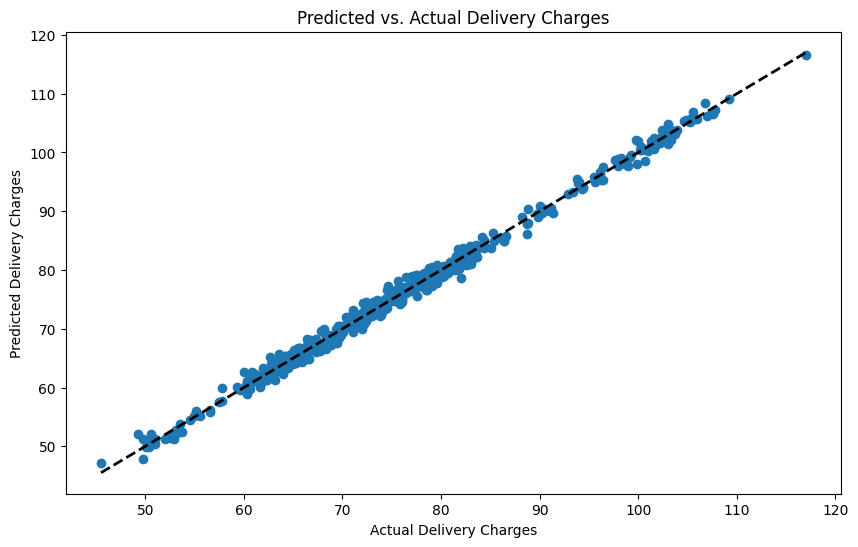

In [239]:
model_, df_dc2 = calculate_regression_and_show(df_dc2, reduced_formula)

In [240]:
df_dc2['diff_charge'] = abs(df_dc2['predicted_delivery_charges'] - df_dc2['delivery_charges'])
df_dc2.head(3)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,_Autumn,_Spring,_Summer,_Winter,predicted_delivery_charges,diff_charge
0,ORD037945,ID0163642887,2019-06-14,Nickolson,"[('Lucent 330S', 2), ('iAssist Line', 1)]",4685.0,65.98,-37.820438,144.960317,25,...,False,0.8375,"ok phone phone sometimes freezes up,otherwise ...",1.0,False,False,False,True,65.216756,0.763244
1,ORD344546,ID6167266592,2019-05-06,Nickolson,"[('Lucent 330S', 1), ('pearTV', 2), ('iAssist ...",24715.0,65.84,-37.809675,144.964029,15,...,False,1.1053,i love my phone delivery was on spot to what w...,1.0,True,False,False,False,66.516702,0.676702
2,ORD037505,ID0593475965,2019-03-14,Nickolson,"[('pearTV', 1), ('Toshika 750', 2)]",14950.0,67.72,-37.810542,144.963598,5,...,False,1.0381,five stars nice,1.0,True,False,False,False,66.251571,1.468429


In [241]:
residuals = model_.resid
standard_deviation_of_error = np.std(residuals)
print("Standard Deviation of Error:", standard_deviation_of_error)

Standard Deviation of Error: 0.980397424847573


In [242]:
significance_level = 0.01 # we expect about 500*0.01 = 5 observations further than corresponding critical value
z_score = norm.ppf(1 - significance_level / 2)
print(f"The z-score for a {significance_level*100}% two-tailed confidence interval is: {z_score}")

The z-score for a 1.0% two-tailed confidence interval is: 2.5758293035489004


In [243]:
critical_value = z_score * standard_deviation_of_error
print("Critical Value:", critical_value)

Critical Value: 2.5253364160462595


In [244]:
df_ = df_dc2[df_dc2['diff_charge'] > critical_value]
print(df_.shape)
df_.head(3)

(6, 22)


,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,...,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,_Autumn,_Spring,_Summer,_Winter,predicted_delivery_charges,diff_charge
52,ORD464146,ID1463620928,2019-05-08,Bakers,"[('pearTV', 2), ('Olivia x460', 2), ('Lucent 3...",17530.0,49.24,-37.816808,145.007359,5,...,False,1.3086,never buy xp phone . after sales service is re...,0.0,True,False,False,False,52.137499,2.897499
90,ORD111416,ID0207141370,2019-06-29,Thompson,"[('Candle Inferno', 2), ('Thunder line', 2)]",5220.0,62.63,-37.824237,144.953912,5,...,True,1.4209,bad battery battery is too bad,0.0,False,False,False,True,65.252354,2.622354
184,ORD145294,ID0128876893,2019-11-08,Bakers,"[('Olivia x460', 1), ('iStream', 1)]",1375.0,88.75,-37.802820,144.995686,0,...,True,0.7998,"very used heavy usage , scratches everywhere ,...",0.0,False,True,False,False,86.106176,2.643824


In [245]:
problem_rows = df_.index.to_list()
print(problem_rows)

[52, 90, 184, 408, 415, 441]


In [246]:
original_df_problem_rows = df_missing_original.loc[problem_rows]
original_df_problem_rows

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
52,ORD464146,ID1463620928,2019-05-08,Bakers,"[('pearTV', 2), ('Olivia x460', 2), ('Lucent 3...",17530.0,49.24,-37.816808,145.007359,5,16702.74,Autumn,False,1.3086,never buy xp phone . after sales service is re...,0.0
90,ORD111416,ID0207141370,2019-06-29,Thompson,"[('Candle Inferno', 2), ('Thunder line', 2)]",5220.0,62.63,-37.824237,144.953912,5,5021.63,Winter,True,1.4209,bad battery battery is too bad,0.0
184,ORD145294,ID0128876893,2019-11-08,Bakers,"[('Olivia x460', 1), ('iStream', 1)]",1375.0,88.75,-37.802820,144.995686,0,1463.75,Spring,True,0.7998,"very used heavy usage , scratches everywhere ,...",0.0
408,ORD188140,ID6202470181,2019-08-13,NaN,"[('pearTV', 2), ('Thunder line', 1), ('Alcon 1...",33000.0,60.02,-37.823004,144.979357,10,29760.02,Winter,True,NaN,mala conexion wifi desde que encendí el teléfo...,0.0
415,ORD355211,ID4716795303,2019-12-23,Thompson,"[('Universe Note', 2), ('iAssist Line', 1), ('...",27175.0,82.01,-37.819137,144.951838,15,23180.76,Summer,True,0.8328,bad experience sim cards weren't able to be re...,0.0
441,ORD235018,ID0846569965,2019-04-19,Nickolson,"[('Alcon 10', 2), ('Olivia x460', 1), ('Univer...",22575.0,74.61,-37.821478,144.969345,5,21520.86,Autumn,True,0.3215,incorrect color giving only 3 stars because i ...,1.0


In [247]:
missing_cols = original_df_problem_rows.columns[original_df_problem_rows.isnull().any()].tolist()
print(missing_cols)

['nearest_warehouse', 'distance_to_nearest_warehouse']


In [248]:
original_df_problem_rows.isnull().sum()

,0
order_id,0
customer_id,0
date,0
nearest_warehouse,1
shopping_cart,0
order_price,0
delivery_charges,0
customer_lat,0
customer_long,0
coupon_discount,0


Among rows which can be potentially wrong there is only one row where we have filled missing value. We have filled the name of nearest_warehouse and distance to nearest warehouse according to coordinates. So we are sure that fillings are correct. It means we don't see any problem based on regression analysis.

## Conclusion for missing data

In [249]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

Our dataframe after filling in all missing values are above

In [250]:
rows_with_nan = df_missing[df_missing.isnull().any(axis=1)]

# Find rows with None values
rows_with_none = df_missing[df_missing.map(lambda x: x is None).any(axis=1)]

# Find rows with '' values
rows_with_empty_string = df_missing[df_missing.map(lambda x: x == '').any(axis=1)]



print("# Rows with NaN values:")
print(rows_with_nan.shape[0])
print("\n# Rows with None values:")
print(rows_with_none.shape[0])
print("\n# Rows with '' values:")
print(rows_with_empty_string.shape[0])

# Rows with NaN values:
0

# Rows with None values:
0

# Rows with '' values:
0


In [251]:
# Output file
# Select only the columns from original_df in df
df_to_save = df_missing[df_missing_original.columns]

# Save the DataFrame to a file
df_to_save.to_csv('Group044_missing_data_solution.csv', index=False)

df_to_save.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    float64
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

# Handling outliers

Our approach involves data preparation, model fitting, residual analysis, clustering, and identification of outliers through various statistical techniques.

In [252]:
# Load outliers dataframe
df_outliers = pd.read_csv('/content/drive/Shareddrives/FIT5196_S2_2024/GroupAssessment2/student_data/Group044/Group044_outlier_data.csv')

In [253]:
# Create copies of original data frame
# To preserve original data
df_outliers_original = df_outliers.copy()

# To perform regression
df_regress = df_outliers.copy()

In [254]:
# Create dummy variables for the 'season' column
season_dummies = pd.get_dummies(df_regress['season'], prefix='')

# Concatenate the dummy variables with the original DataFrame
df_regress = pd.concat([df_regress, season_dummies], axis=1)

# Print the updated DataFrame to verify the encoding
df_regress.head(3)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,_Autumn,_Spring,_Summer,_Winter
0,ORD366091,ID0591435935,2019-09-24,Nickolson,"[('Universe Note', 1), ('Thunder line', 2), ('...",9040,57.11,-37.819074,144.965235,5,8645.11,Spring,False,0.3832,horrible product very bad product stop working...,False,False,True,False,False
1,ORD498812,ID0304466089,2019-06-06,Nickolson,"[('iStream', 2), ('Candle Inferno', 2), ('Luce...",20290,74.86,-37.818224,144.964299,25,15292.36,Winter,True,0.4636,five stars super,True,False,False,False,True
2,ORD197285,ID0306904051,2019-04-02,Thompson,"[('Lucent 330S', 2), ('Candle Inferno', 1)]",2890,77.85,-37.808411,144.950987,0,2967.85,Autumn,True,0.5864,brgary was very happy to get the same phone th...,True,True,False,False,False


                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     73.67
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          2.96e-101
Time:                        11:20:46   Log-Likelihood:                -1913.9
No. Observations:                 500   AIC:                             3854.
Df Residuals:                     487   BIC:                             3909.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

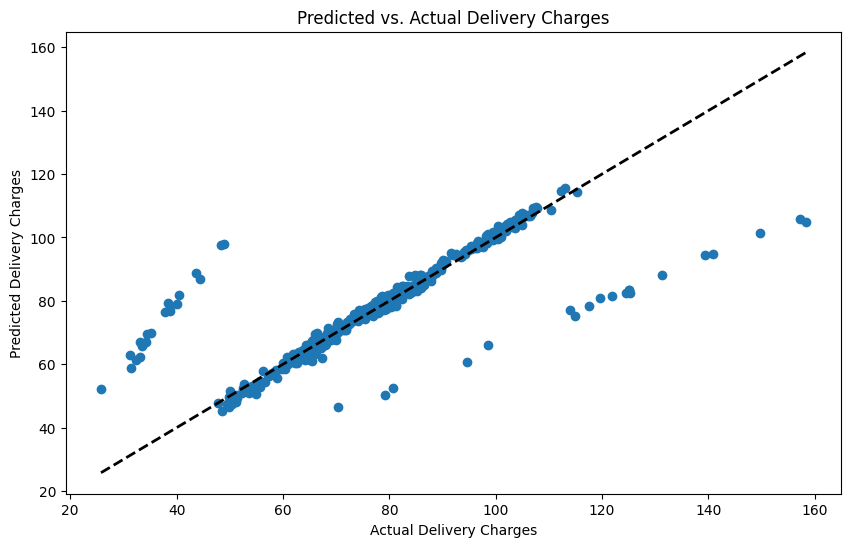

In [255]:
# Run regression using the function defined in cleaning dirty_data section
formula = 'delivery_charges ~ distance_to_nearest_warehouse + is_expedited_delivery + is_happy_customer +\
           _Spring + _Summer + _Autumn + distance_to_nearest_warehouse*_Spring + distance_to_nearest_warehouse*_Summer + distance_to_nearest_warehouse*_Autumn +\
           is_expedited_delivery*_Spring + is_expedited_delivery*_Summer + is_expedited_delivery*_Autumn'
model, df_ = calculate_regression_and_show(df_regress, formula)

We will check the residuals of all points

In [256]:
residuals = model.resid

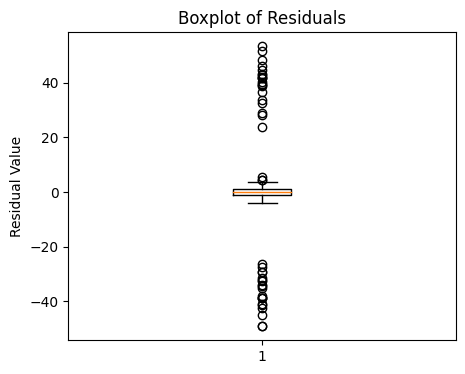

In [257]:
# Visualise the residuals
plt.figure(figsize=(5, 4))
plt.boxplot(residuals)
plt.title('Boxplot of Residuals')
plt.ylabel('Residual Value')
plt.show()

We expect that the residuals of a linear model would be normally distributed

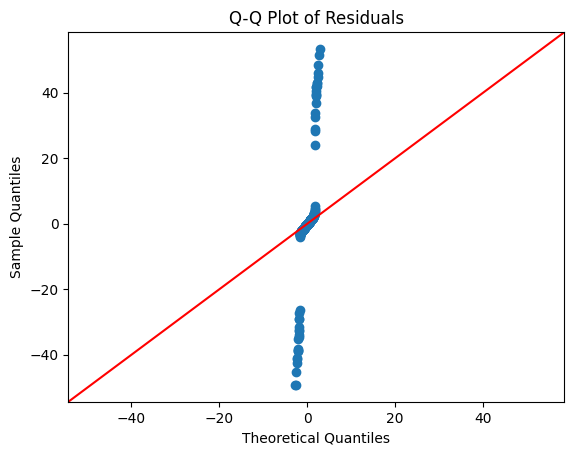

In [258]:
import statsmodels.api as sm_api
# Create a Q-Q plot of the residuals
sm_api.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

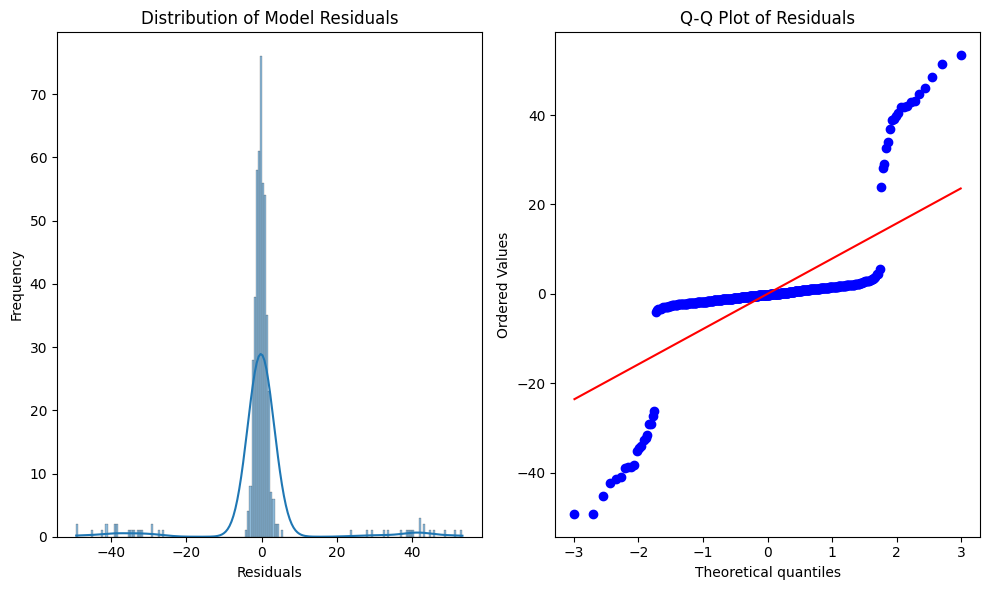

Shapiro-Wilk Test for Residuals:
Test Statistic: 0.5010688907143326
P-value: 3.767262211916988e-35
The residuals are not likely normally distributed (reject H0).


In [259]:
graph_residuals(model, model, df_)

In [260]:
# Check the standard deviation of residuals
standard_deviation_of_error = np.std(residuals)
print("Standard Deviation of Error:", standard_deviation_of_error)

Standard Deviation of Error: 11.121528521805992


In [261]:
# Sort residuals and get their indices for further analysis
sorted_residuals_with_index = residuals.sort_values()
sorted_residuals = sorted_residuals_with_index.values
sorted_residuals_ind = sorted_residuals_with_index.index.to_list()

In [262]:
# Prepare for the Q-Q plot of residuals
q_res = sorted_residuals
q_norm = []
shift_q = 1 / df.shape[0] * 0.5  # Adjust shift for quantile normalization

In [263]:
# Calculate theoretical quantiles
for i in range(df.shape[0]):
    q_norm.append(norm.ppf(i / df.shape[0] + shift_q, loc=0, scale=standard_deviation_of_error))

q_norm = np.array(q_norm)

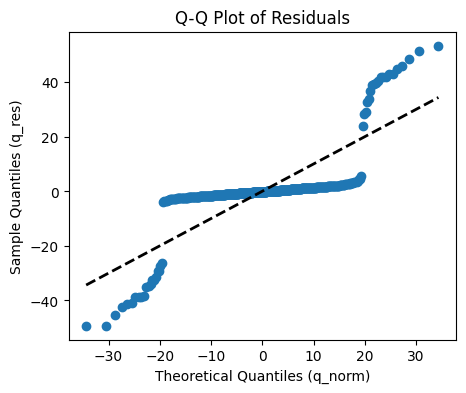

In [264]:
# Create a Q-Q plot of residuals against theoretical quantiles
plt.figure(figsize=(5, 4))
plt.scatter(q_norm, q_res)
plt.xlabel('Theoretical Quantiles (q_norm)')
plt.ylabel('Sample Quantiles (q_res)')
plt.title('Q-Q Plot of Residuals')
plt.plot([min(q_norm), max(q_norm)], [min(q_norm), max(q_norm)], 'k--', lw=2)
plt.show()

In [265]:
# Combine theoretical and sample quantiles for clustering analysis
data_for_clustering = np.column_stack((q_norm, q_res))

In [266]:
# Initialize and fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_for_clustering)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Print the cluster centers for analysis
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Analyze the distribution of data points within each cluster
print("\nNumber of data points in each cluster:")
unique_labels, counts = np.unique(cluster_labels, return_counts=True)
for label, count in zip(unique_labels, counts):
    print(f"Cluster {label}: {count} data points")

Cluster Centers:
[[ 1.76399957e-16 -1.37020864e-01]
 [ 2.39087209e+01  3.99249344e+01]
 [-2.39087209e+01 -3.67734546e+01]]

Number of data points in each cluster:
Cluster 0: 460 data points
Cluster 1: 20 data points
Cluster 2: 20 data points


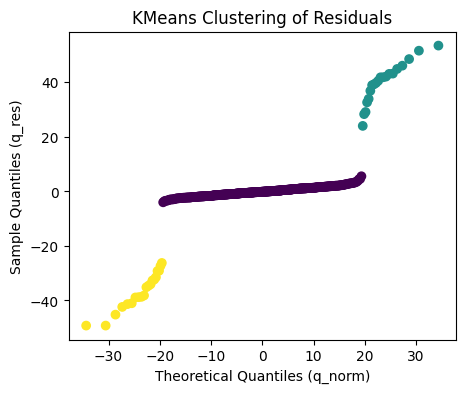

In [267]:
# Visualize the clusters using a scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(data_for_clustering[:, 0], data_for_clustering[:, 1], c=cluster_labels)
plt.xlabel('Theoretical Quantiles (q_norm)')
plt.ylabel('Sample Quantiles (q_res)')
plt.title('KMeans Clustering of Residuals')
plt.show()

In [268]:
# Get indices of observations in each cluster for further analysis
cluster_0_indices = [ind for label, ind in zip(cluster_labels, sorted_residuals_ind) if label == 0]
cluster_1_indices = [ind for label, ind in zip(cluster_labels, sorted_residuals_ind) if label == 1]
cluster_2_indices = [ind for label, ind in zip(cluster_labels, sorted_residuals_ind) if label == 2]

# Print the indices of observations in clusters
print("Indexes for observations in cluster 0:", cluster_0_indices)
print("Indexes for observations in cluster 1:", cluster_1_indices)
print("Indexes for observations in cluster 2:", cluster_2_indices)

Indexes for observations in cluster 0: [30, 486, 182, 74, 178, 384, 73, 296, 18, 185, 130, 396, 118, 355, 305, 379, 414, 80, 319, 254, 350, 390, 288, 356, 399, 175, 57, 66, 491, 22, 373, 292, 8, 435, 9, 16, 242, 291, 325, 68, 48, 492, 83, 416, 464, 446, 432, 440, 300, 54, 113, 424, 289, 239, 142, 65, 101, 348, 103, 196, 29, 481, 115, 346, 25, 161, 349, 190, 164, 324, 147, 323, 132, 485, 264, 326, 270, 353, 44, 374, 403, 180, 451, 359, 171, 297, 317, 58, 315, 222, 293, 20, 189, 351, 38, 250, 144, 284, 344, 210, 200, 278, 198, 463, 434, 468, 401, 213, 294, 335, 354, 63, 499, 69, 247, 77, 39, 234, 143, 496, 111, 389, 290, 365, 475, 81, 126, 429, 277, 314, 188, 455, 408, 212, 13, 205, 135, 229, 231, 125, 304, 75, 441, 86, 248, 36, 327, 87, 99, 443, 246, 462, 240, 255, 33, 484, 110, 308, 388, 409, 495, 4, 343, 78, 410, 172, 490, 280, 169, 35, 489, 64, 447, 209, 249, 3, 285, 357, 338, 306, 469, 473, 256, 436, 273, 218, 51, 173, 215, 85, 195, 43, 483, 168, 347, 49, 400, 318, 60, 295, 282, 186

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     73.67
Date:                Fri, 18 Oct 2024   Prob (F-statistic):          2.96e-101
Time:                        11:20:58   Log-Likelihood:                -1913.9
No. Observations:                 500   AIC:                             3854.
Df Residuals:                     487   BIC:                             3909.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

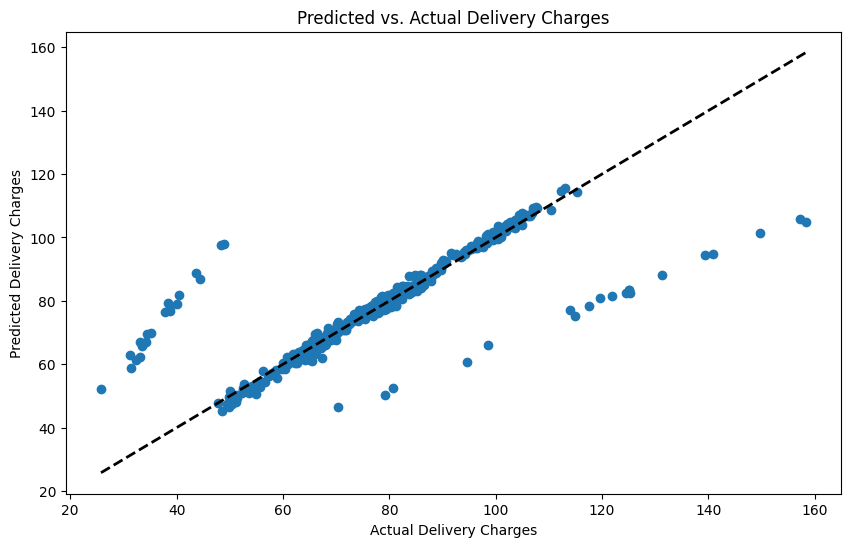

In [269]:
# Fit the regression model and obtain predictions on the cleaned DataFrame
model, df_regress = calculate_regression_and_show(df_regress, formula)

In [270]:
# Calculate the residuals (differences between actual and predicted values)
residuals = model.resid

In [271]:
# Initialize cluster labels in the DataFrame
df_regress['cluster'] = -1  # Default to -1 (no cluster)

# Assign cluster labels based on the previously determined indices
df_regress.loc[cluster_0_indices, 'cluster'] = 0
df_regress.loc[cluster_1_indices, 'cluster'] = 1
df_regress.loc[cluster_2_indices, 'cluster'] = 2

<Figure size 800x600 with 0 Axes>

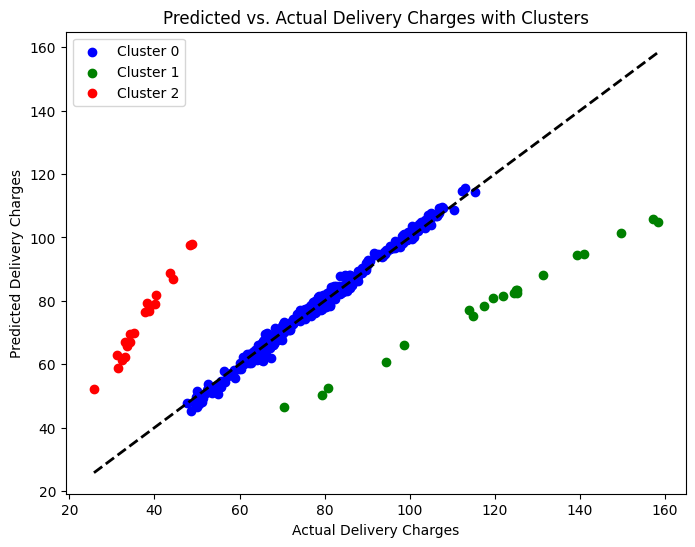

In [272]:
# Create a scatter plot for actual vs predicted delivery charges, colored by cluster
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Define colors for each cluster

# Create a scatter plot for actual vs predicted delivery charges, colored by cluster
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  # Define colors for each cluster

# Plot points for each cluster
for cluster_label in df_regress['cluster'].unique():
    cluster_data = df_regress[df_regress['cluster'] == cluster_label]
    plt.scatter(
        cluster_data['delivery_charges'],
        cluster_data['predicted_delivery_charges'],
        label=f'Cluster {cluster_label}',
        color=colors[cluster_label] if cluster_label in range(len(colors)) else 'gray'  # Use gray for unexpected clusters
    )

plt.xlabel('Actual Delivery Charges')
plt.ylabel('Predicted Delivery Charges')
plt.title('Predicted vs. Actual Delivery Charges with Clusters')
plt.plot([df_regress['delivery_charges'].min(), df_regress['delivery_charges'].max()],
         [df_regress['delivery_charges'].min(), df_regress['delivery_charges'].max()], 'k--', lw=2)  # Diagonal reference line
plt.legend()
plt.show()

In [273]:
def find_outlier_indices_3sigmas(residuals, sign_level=None):
    """
    Finds the indices of outliers in a series of residuals based on the 3 sigma method.

    Args:
        residuals: A pandas Series containing the residuals.

    Returns:
        A list of indices corresponding to the outliers.
    """
    # Determine z-score threshold
    if sign_level is None:
        z_score = 3  # Default z-score for 3 sigma
    else:
        z_score = norm.ppf(1 - sign_level / 2)  # Z-score for specified significance level

    # Calculate the bounds for outliers
    lower_bound = 0 - z_score * residuals.std()
    upper_bound = 0 + z_score * residuals.std()

    # Identify outlier indices
    outlier_indices = residuals[(residuals < lower_bound) | (residuals > upper_bound)].index.tolist()
    return outlier_indices, lower_bound, upper_bound

In [274]:
# Store absolute residuals for further analysis
df_regress['abs_residuals'] = residuals

# Find outlier indices using the 3-sigma method
outlier_indices, lower_bound, upper_bound = find_outlier_indices_3sigmas(residuals, 0.05)
print("Number of outliers:", len(outlier_indices))
print("Indices of outliers:", outlier_indices)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

Number of outliers: 40
Indices of outliers: [14, 24, 53, 62, 84, 90, 94, 96, 109, 119, 127, 136, 149, 150, 153, 157, 165, 177, 199, 206, 207, 219, 225, 236, 252, 257, 287, 298, 309, 334, 370, 405, 411, 412, 422, 433, 445, 450, 494, 497]
Lower bound: -21.819625902413563
Upper bound: 21.819625902413563


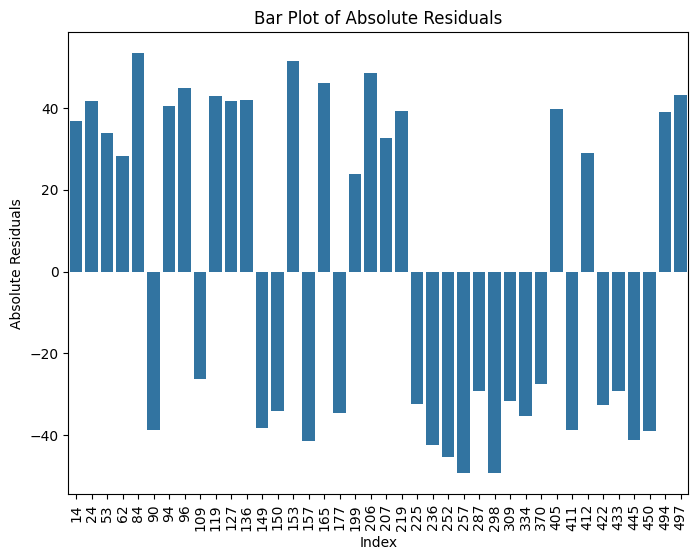

In [275]:
# Create a bar plot of absolute residuals for the identified outliers
df_u = df_regress.iloc[outlier_indices]
plt.figure(figsize=(8, 6))
sns.barplot(x=df_u.index, y=df_u['abs_residuals'])
plt.xlabel('Index')
plt.ylabel('Absolute Residuals')
plt.title('Bar Plot of Absolute Residuals')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [276]:
# Create a new DataFrame excluding the identified outliers
df_regress_no_outliers = df_regress.drop(index=outlier_indices)

                            OLS Regression Results                            
Dep. Variable:       delivery_charges   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     8448.
Date:                Fri, 18 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:21:01   Log-Likelihood:                -628.16
No. Observations:                 460   AIC:                             1282.
Df Residuals:                     447   BIC:                             1336.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

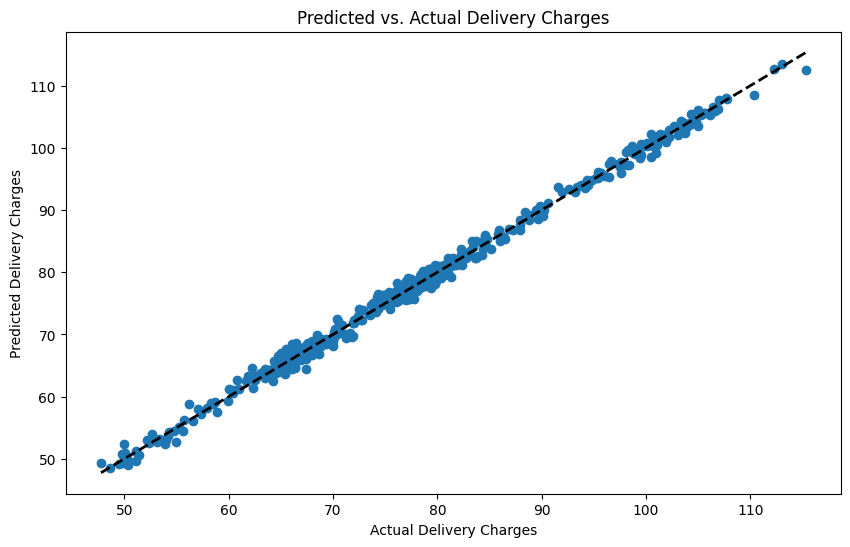

In [277]:
# Re-fit the regression model without outliers
model0, df_reg0 = calculate_regression_and_show(df_regress_no_outliers, formula)

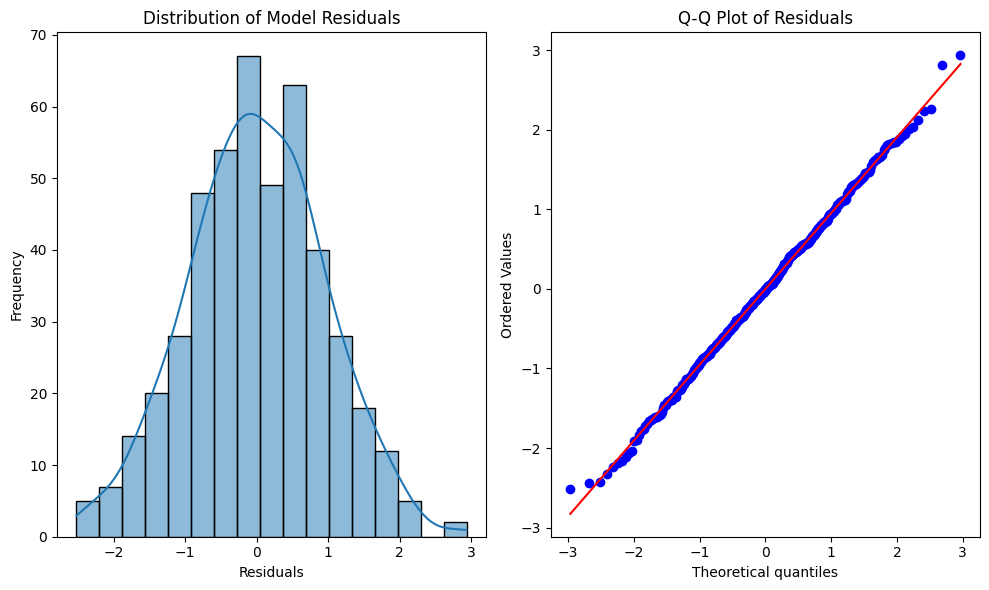

Shapiro-Wilk Test for Residuals:
Test Statistic: 0.998463649708345
P-value: 0.9608319779618824
The residuals are likely normally distributed (fail to reject H0).


In [278]:
graph_residuals(model0, model0, df_reg0)

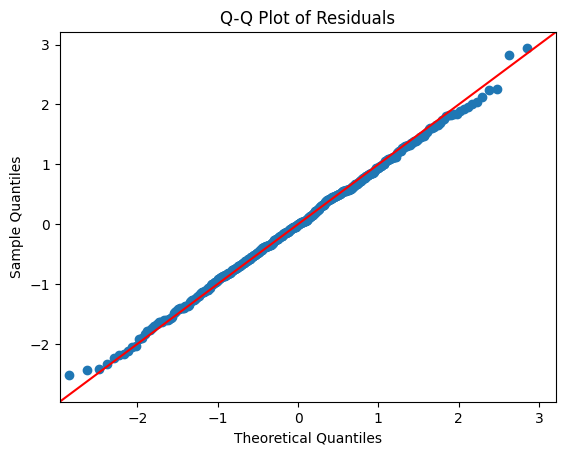

In [279]:
# Calculate new residuals after removing outliers
residuals0 = model0.resid

# Create a Q-Q plot for the new residuals
sm_api.qqplot(residuals0, line='45')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

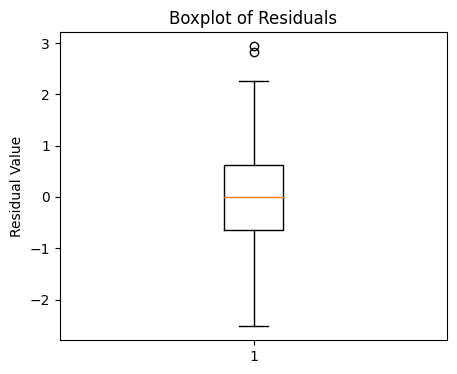

In [280]:
# Create a boxplot for the new residuals
plt.figure(figsize=(5, 4))
plt.boxplot(residuals0)
plt.title('Boxplot of Residuals')
plt.ylabel('Residual Value')
plt.show()

In [281]:
# Find potential outliers in the new residuals
potential_outlier_indices, lb, ub = find_outlier_indices_3sigmas(residuals0)

print("Indices of potential outliers:", potential_outlier_indices)

Indices of potential outliers: [226]


In [282]:
# Calculate z-scores for the new bounds
z_score_up = abs(ub - np.mean(residuals0)) / np.std(residuals0)
z_score_low = abs(lb - np.mean(residuals0)) / np.std(residuals0)

# Calculate p-values for the new bounds
p_value_up = 2 * (1 - norm.cdf(abs(z_score_up)))
p_value_low = 2 * (1 - norm.cdf(abs(z_score_low)))

# Print z-scores and p-values
print(f"The z-score for upper bound is: {z_score_up:.4f}")
print(f"The p-value for upper bound is: {p_value_up:.4f}")
print(f"The z-score for lower bound is: {z_score_low:.4f}")
print(f"The p-value for lower bound is: {p_value_low:.4f}")

The z-score for upper bound is: 3.0033
The p-value for upper bound is: 0.0027
The z-score for lower bound is: 3.0033
The p-value for lower bound is: 0.0027


In [283]:
def binomial_probability(n, m, p):
    # Calculate the binomial coefficient
    binom_coeff = factorial(n) / (factorial(m) * factorial(n - m))

    # Calculate the probability using the binomial distribution formula
    probability = binom_coeff * (p ** m) * ((1 - p) ** (n - m))
    return probability

# Calculate the probability of finding the observed number of outliers
prob_to_find = binomial_probability(residuals0.shape[0], len(potential_outlier_indices), p_value_up + p_value_low)
prob_to_find

0.21024702061483608

In [284]:
df_regress_no_outliers.to_csv('Group044_outlier_data_solution.csv', index=False)

# References


1. **numpy (np)**:  
   Harris, C. R., Millman, K. J., van der Walt, S. J., et al. (2020). *Array programming with NumPy*. Nature, 585(7825), 357-362. https://doi.org/10.1038/s41586-020-2649-2

2. **pandas (pd)**:  
   McKinney, W. (2010). *Data Structures for Statistical Computing in Python*. Proceedings of the 9th Python in Science Conference, 51-56. https://doi.org/10.25080/Majora-92bf1922-00a

3. **datetime (dt)**:  
   Python Software Foundation. (n.d.). *datetime — Basic date and time types*. Retrieved from https://docs.python.org/3/library/datetime.html

4. **copy**:  
   Python Software Foundation. (n.d.). *copy — Shallow and deep copy operations*. Retrieved from https://docs.python.org/3/library/copy.html

5. **re**:  
   Python Software Foundation. (n.d.). *re — Regular expression operations*. Retrieved from https://docs.python.org/3/library/re.html

6. **matplotlib.pyplot (plt)**:  
   Hunter, J. D. (2007). *Matplotlib: A 2D Graphics Environment*. Computing in Science & Engineering, 9(3), 90-95. https://doi.org/10.1109/MCSE.2007.55

7. **seaborn (sns)**:  
   Waskom, M. L. (2021). *Seaborn: Statistical Data Visualization*. Journal of Open Source Software, 6(60), 3021. https://doi.org/10.21105/joss.03021

8. **math**:  
   Python Software Foundation. (n.d.). *math — Mathematical functions*. Retrieved from https://docs.python.org/3/library/math.html

9. **statsmodels.formula.api (sm)**:  
   Seabold, S., & Perktold, J. (2010). *Statsmodels: Econometric and Statistical Modeling with Python*. Proceedings of the 9th Python in Science Conference, 57-61. https://doi.org/10.25080/Majora-92bf1922-011

10. **statsmodels.stats.anova (sms)**:  
    Python Software Foundation. (n.d.). *Statsmodels: ANOVA (Analysis of Variance)*. Retrieved from https://www.statsmodels.org

11. **sklearn.cluster.KMeans**:  
    Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825-2830. https://jmlr.org/papers/v12/pedregosa11a.html

12. **itertools**:  
    Python Software Foundation. (n.d.). *itertools — Functions creating iterators for efficient looping*. Retrieved from https://docs.python.org/3/library/itertools.html

13. **sklearn.linear_model.LinearRegression**:  
    Pedregosa, F., Varoquaux, G., Gramfort, A., et al. (2011). *Scikit-learn: Machine Learning in Python*. Journal of Machine Learning Research, 12, 2825-2830. https://jmlr.org/papers/v12/pedregosa11a.html

14. **nltk.sentiment.vader.SentimentIntensityAnalyzer**:  
    Bird, S., Klein, E., & Loper, E. (2009). *Natural Language Toolkit*. Retrieved from https://www.nltk.org

15. **scipy.stats.chi2**:  
    Virtanen, P., Gommers, R., Oliphant, T. E., et al. (2020). *SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python*. Nature Methods, 17, 261-272. https://doi.org/10.1038/s41592-019-0686-2

16. **scipy.stats.norm**:  
    Virtanen, P., Gommers, R., Oliphant, T. E., et al. (2020). *SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python*. Nature Methods, 17, 261-272. https://doi.org/10.1038/s41592-019-0686-2

17. **nltk**:  
    Bird, S., Klein, E., & Loper, E. (2009). *Natural Language Toolkit*. Retrieved from https://www.nltk.org


We acknowledge the use of Gen-AI (ChatGPT, Copylot and Gemini) to get some hints about specific Python libraries/functions/classes/methods/options/settings. Every information from AI has been found and double-checked in the original library manuals.  